## Credit Card Fraud Detection

With the rise in number of online transactions we see that the frauds being committed using the credit
cards are also on rise. It is going to be very challenging to have manual verification on each and every
transaction, so here is where Machine Learning comes into picture where we train models to predict
what transactions could be fraud.

## Approach:
##### Importing required Libraries: 
Import the required Libraries - Numpy, Pandas, Matplotlib,
Sklearn, Scipy, Statsmodels etc. which are required for analysis and model building.
#####  On-boarding data: 
Load the given data set into the Notebook and try to understand the basic
information of the same, like shape, size, info etc.
##### Data Cleaning:
Treat the duplicate data, null data, outliers as needed, based on EDA.
##### EDA: 
Performing Univariate Analysis, Bi-Variate Analysis, New Feature preparation, Outlier
Treatment, Data Imbalance Check etc.
##### Handling Data Imbalance:
Handle imbalance of data by appropriate techniques (Over sampling/under sampling/ SMOTE technique)
#####  Data Preparation: 
Convert features into gaussian, New feature preparations/ transformations,
dropping columns without much variance (if needed), Scaling the data. Normalization of the
data may not be required as the provided data set is already PCA transformed.
##### Test -Train split: Perform train test split for the dataset to work that would be used for model
training and testing.
#####  Model Building: Perform Cross validation of the training dataset, build a basic model which acts
as POC and helps us to decide on the necessary improvements that are required and serves the
purpose of baseline. Cross-Validation can be either K-Fold or Stratified K-Fold that can be
performed.
#####  Some of the models could be considered based on their characteristics as below:
- Logistic Regression
- Decision Trees
- Random Forest
- XGBoost 
- KNN etc.,

#####  Hyper-parameter tuning & derive metrics: 
Perform the hyper parameter tuning and observe the relevant metrics like - accuracy/ recall/ sensitivity/ AUC etc. for each model.
#####  Model Evaluation: 
Here the goal is to identify the True Positive cases more efficiently so that we would need to optimize our models to get the highest Recall score so that the models are efficient in flagging the fraud transactions. The prime focus is attaining Optimal recall score.
#####  Summarization:
Compare the models based on the scores of the Recall and AUC metric and
accordingly consider the best model that can be recommended to the Bank to opt for, that
would be beneficial to the overall Business.
#####  Cost-benefit analysis/Business Value-Add:
It is necessary to determine how much profit or dollar/rupee value we would be saving with the best-selected model that is being built and
considered.

### Importing required Libraries

In [1]:
#import all the necessary libraries

import warnings
warnings.filterwarnings('ignore')
import os
import csv
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
%matplotlib inline 
from seaborn import countplot, axes_style
import seaborn as sns

from IPython.display import display
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 300

# To Scale our data
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler

from IPython.display import display
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 300

import math
from sklearn import metrics
import itertools

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score, recall_score,roc_auc_score

from imblearn import over_sampling
from imblearn.over_sampling import ADASYN

from imblearn.over_sampling import RandomOverSampler

### Exploratory data analysis

In [2]:
#Onboarding the dataset
creditcard_df = pd.read_csv('creditcard.csv')
creditcard_df.head()
creditcard_df_2= creditcard_df.copy(deep= True)

In [3]:
#Checking the shape of the dataset
creditcard_df.shape

(284807, 31)

In [4]:
#To understand the names of the columns in dataset and their corresponding data types
creditcard_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Checking the nature of data
creditcard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Checking for the percentage of null values in the data set
print(creditcard_df.isnull().sum()*100/creditcard_df.shape[0])

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64


In [7]:
max(creditcard_df.isnull().sum())

0

- There are no null values in the dataframe

In [8]:
#Checking the Non_Fraud/Fraud for the column - class
class_count = creditcard_df['Class'].value_counts()
class_count

0    284315
1       492
Name: Class, dtype: int64

In [9]:
#Imbalance Percentage caluculation
(creditcard_df.groupby('Class')['Class'].count()/creditcard_df['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [10]:
Non_Fraud=class_count[0]/creditcard_df['Class'].count()*100
print("Non-Fraud Transaction Percentage:", round(Non_Fraud,3))
Fraud=class_count[1]/creditcard_df['Class'].count()*100
print("Fraud Transaction Percentage:", round(Fraud,3))

Non-Fraud Transaction Percentage: 99.827
Fraud Transaction Percentage: 0.173


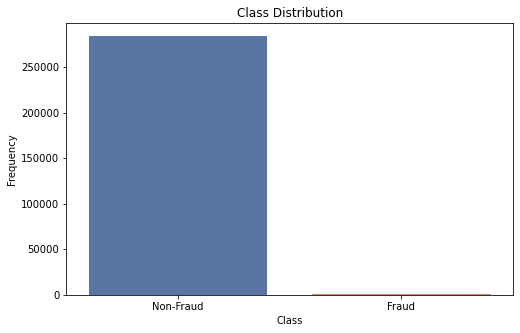

In [11]:
#Plotting the class distribution
plt.figure(figsize=(8,5))
sns.countplot(x = "Class", palette='deep', data = creditcard_df)
plt.xticks(rotation = 0)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Class Distribution")
creditcard_df["Class"].value_counts()
labels = ["Non-Fraud", "Fraud"]
plt.xticks(range(2), labels)
plt.show()

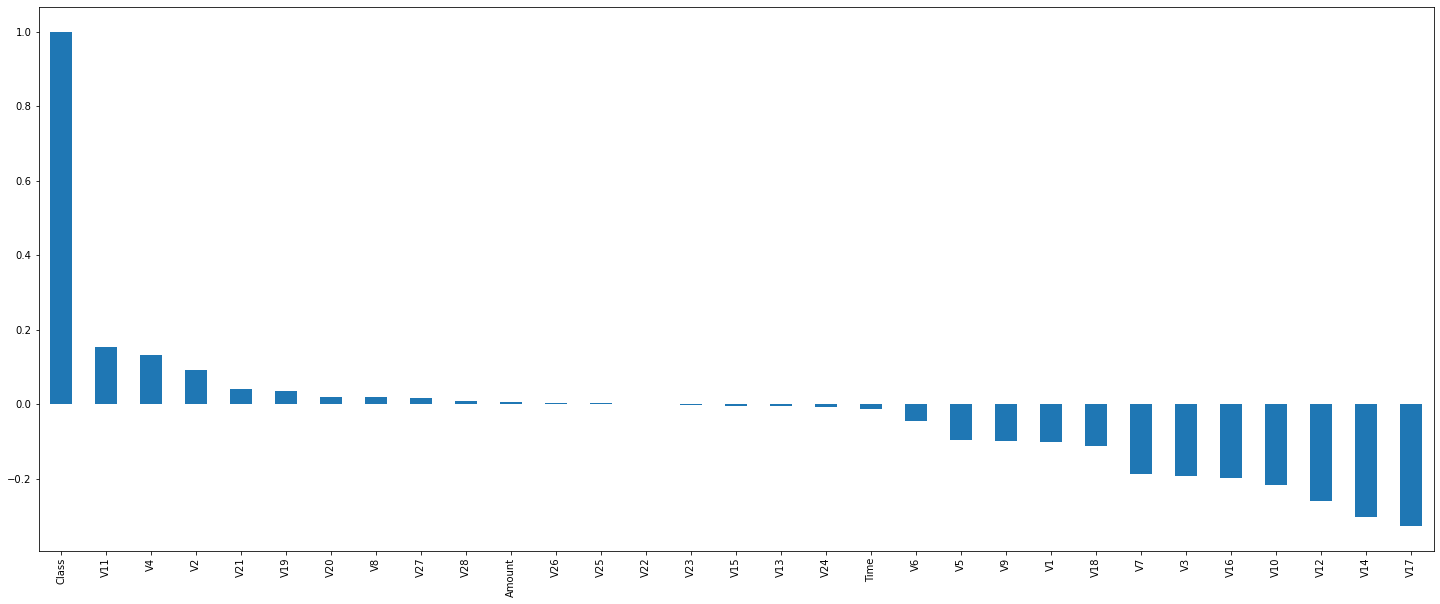

In [12]:
#To check the highly correlated features with the cust_churned feature. 
plt.figure(figsize=(25,10))
creditcard_df.corr()['Class'].sort_values(ascending = False).plot(kind='bar')
plt.show()

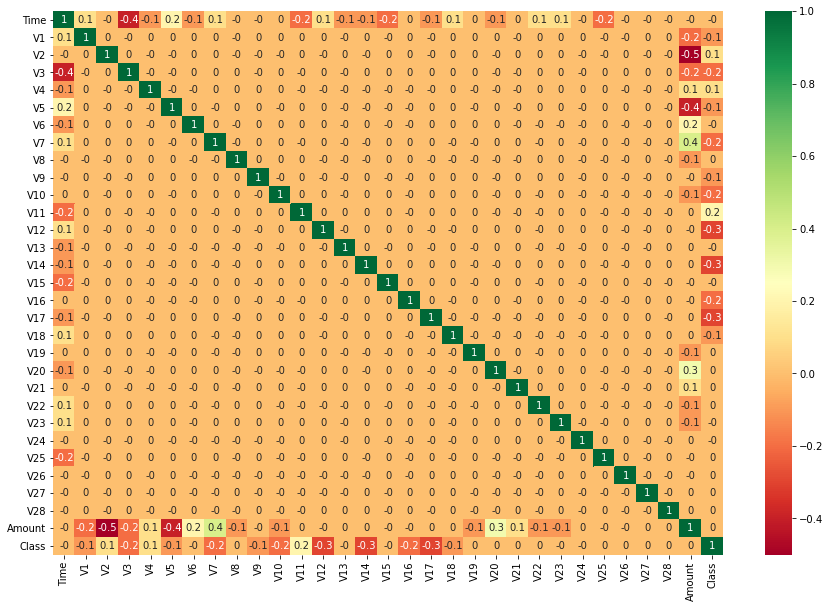

In [13]:
# Checking the correlation among features using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(round(creditcard_df.corr(method ='pearson'),1),annot=True,cmap='RdYlGn')
plt.show()

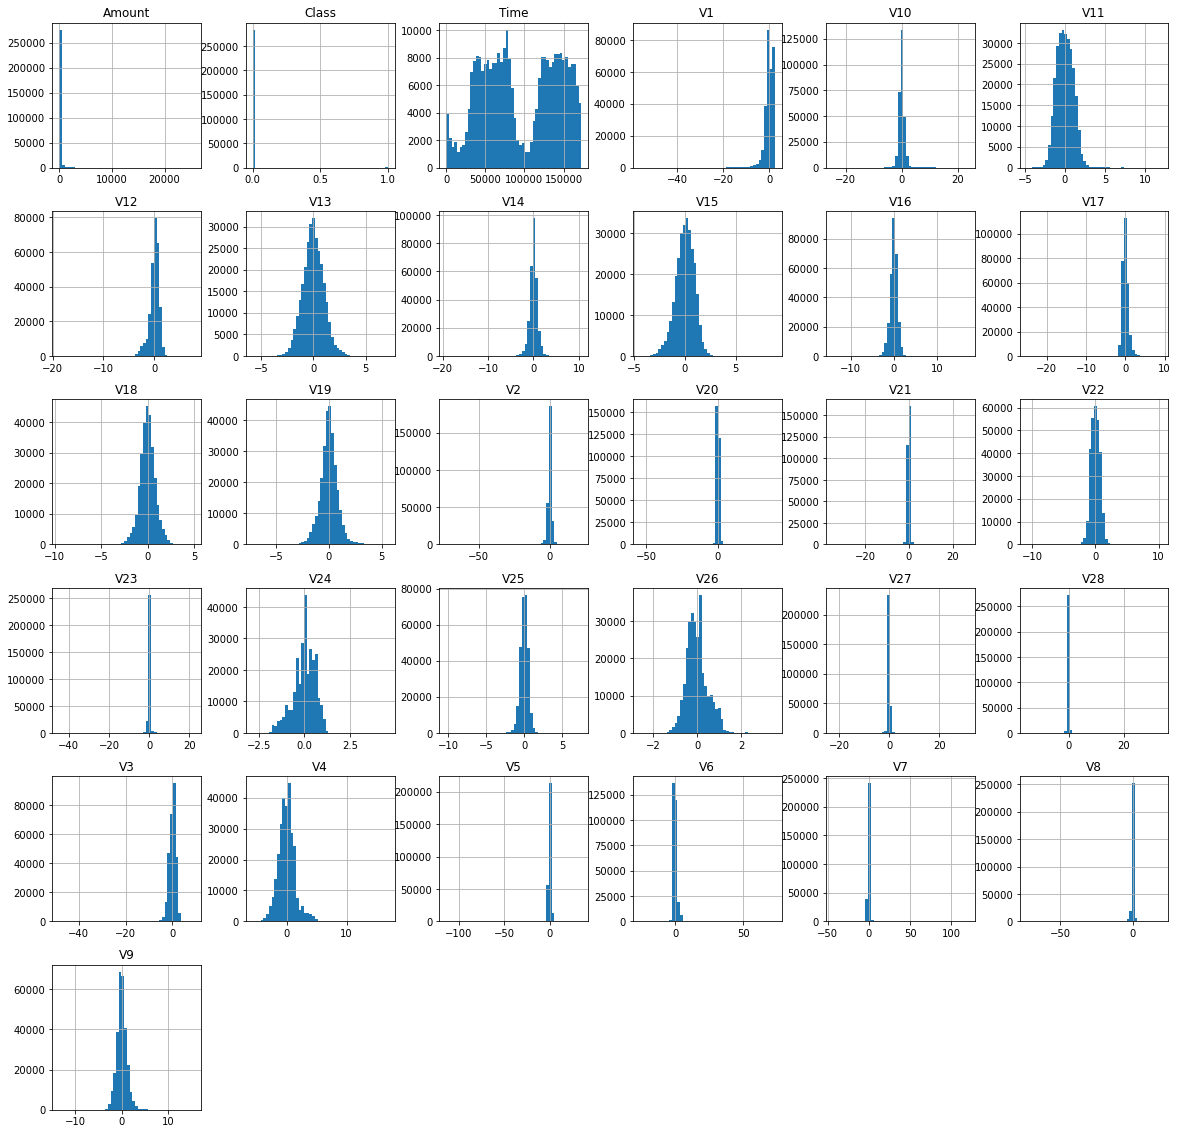

In [14]:
# Univariate Analysis of features
# Plotting histograms
creditcard_df.hist(bins=50,figsize=(20,20))
plt.show()

Text(0.5, 1.0, 'Time distribution for Non-Fraud Transactions')

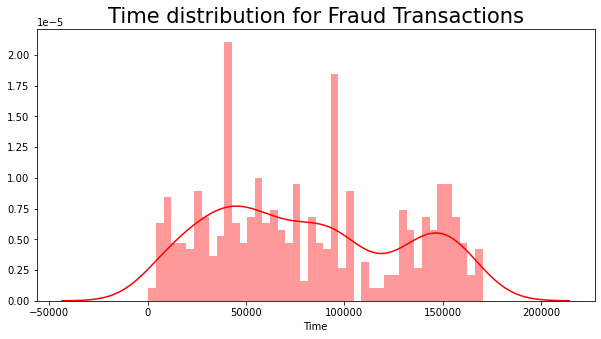

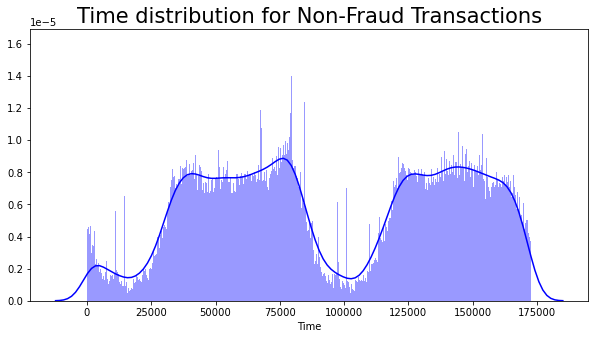

In [15]:
# Checking the frequency of Fraud Transactions with respect to time
plt.figure(figsize = (10,5))
sns.distplot(creditcard_df['Time'].loc[creditcard_df['Class']==1],bins = int(math.sqrt(len(creditcard_df['Time'].loc[creditcard_df['Class']==1]))*2), color='red')
plt.title("Time distribution for Fraud Transactions", fontsize=21)

# Checking the frequency of Non-Fraud Transactions with respect to time
plt.figure(figsize = (10,5))
sns.distplot(creditcard_df['Time'].loc[creditcard_df['Class']==0],bins = int(math.sqrt(len(creditcard_df['Time'].loc[creditcard_df['Class']==0]))*2), color = 'blue')
plt.title("Time distribution for Non-Fraud Transactions", fontsize=21)


##### Observation:
- We can clearly see that the Non-Fraud frequency is very less when compared to the Non Fradu in the Time distribution

Text(0.5, 1.0, 'Amount distribution for both classes')

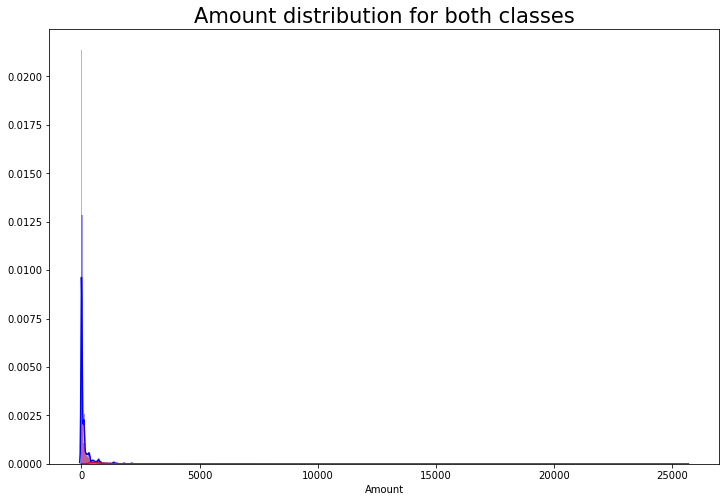

In [16]:
# Checking the Amount distribution for both the classes
plt.figure(figsize = (12,8))
sns.distplot(creditcard_df['Amount'].loc[creditcard_df['Class']==1],bins = int(math.sqrt(len(creditcard_df['Amount'].loc[creditcard_df['Class']==1]))*2), color='blue')
sns.distplot(creditcard_df['Amount'].loc[creditcard_df['Class']==0],bins = int(math.sqrt(len(creditcard_df['Amount'].loc[creditcard_df['Class']==0]))*2), color = 'red')
plt.title("Amount distribution for both classes", fontsize=21)

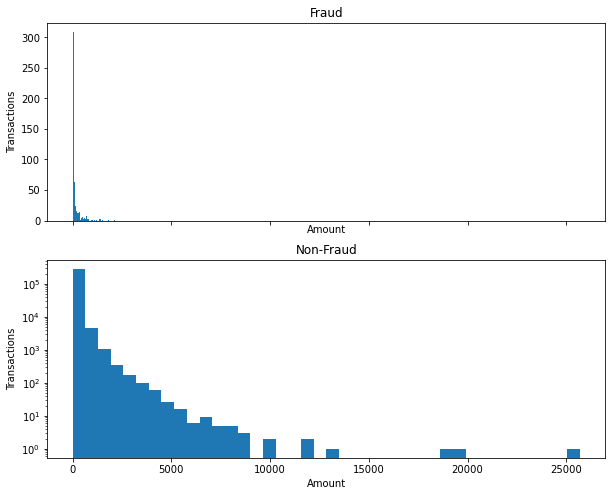

In [17]:
#To understand how different the amount is in case of fraud and non-fraud
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,8)) 
bins = 40
ax1.hist(creditcard_df.Amount[creditcard_df.Class == 1], bins = bins)
ax1.set_title('Fraud')
ax1.set_ylabel('Transactions')
ax1.set_xlabel('Amount')

ax2.hist(creditcard_df.Amount[creditcard_df.Class == 0], bins = bins)
ax2.set_title('Non-Fraud')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Transactions')
plt.yscale('log')
plt.show()

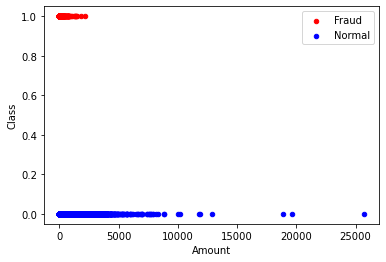

In [18]:
fraud_df = creditcard_df.loc[creditcard_df['Class'] == 1]
Nonfraud_df = creditcard_df.loc[creditcard_df['Class'] == 0]
ax = fraud_df.plot.scatter(x='Amount', y='Class', c='Red', label='Fraud')
Nonfraud_df.plot.scatter(x='Amount', y='Class', c='Blue', label='Normal', ax=ax)
plt.show()

##### Observations:
- we can see that the fraudulent transactions doesnt have any amount more than 3000

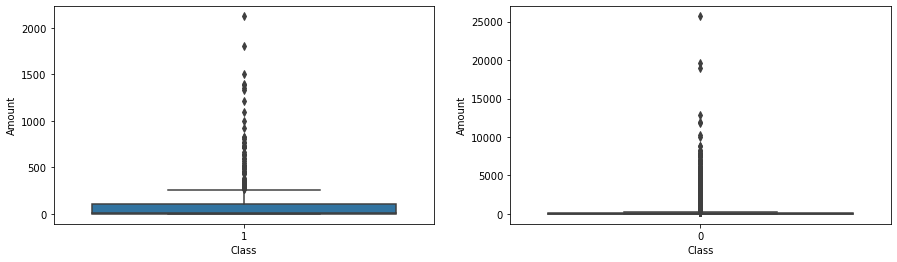

In [19]:
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'Amount', data = fraud_df)
plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'Amount', data = Nonfraud_df)

##### Checking Outliers

In [20]:
def outlier(features):
    plt.figure(figsize=(20,5))
    features = features
    for i in enumerate(features):
        ax = plt.subplot(1,8, i[0]+1)
        sns.boxplot(i[1], data = creditcard_df_2)

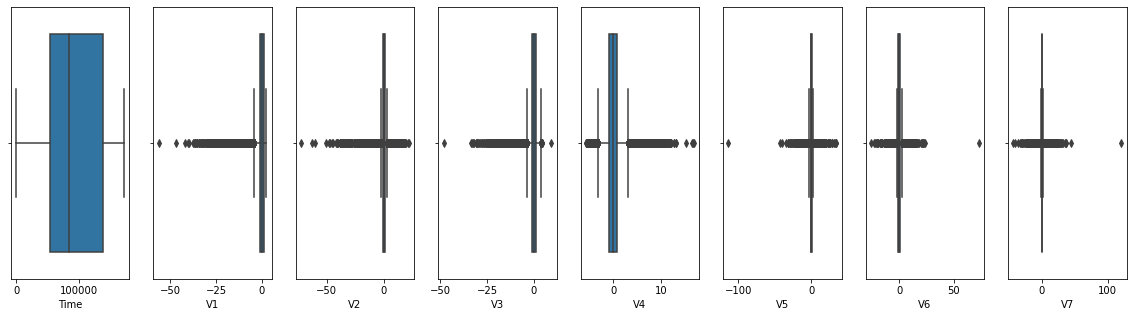

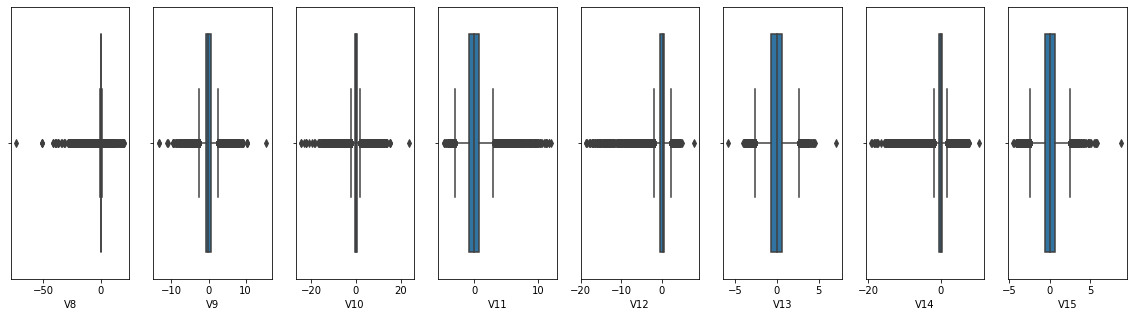

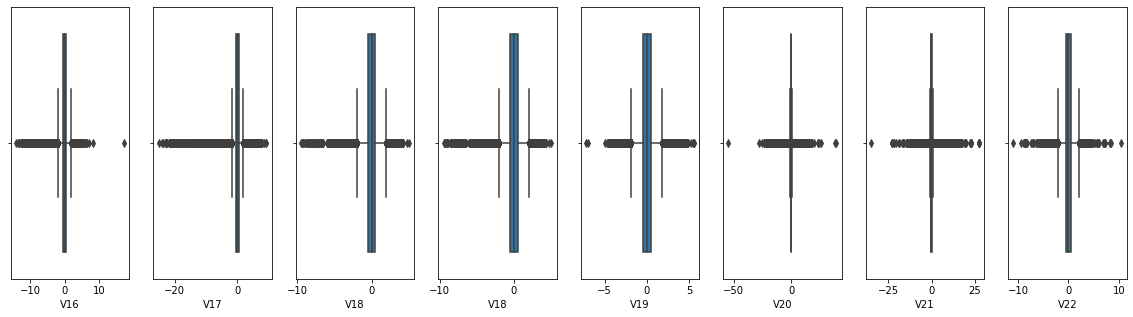

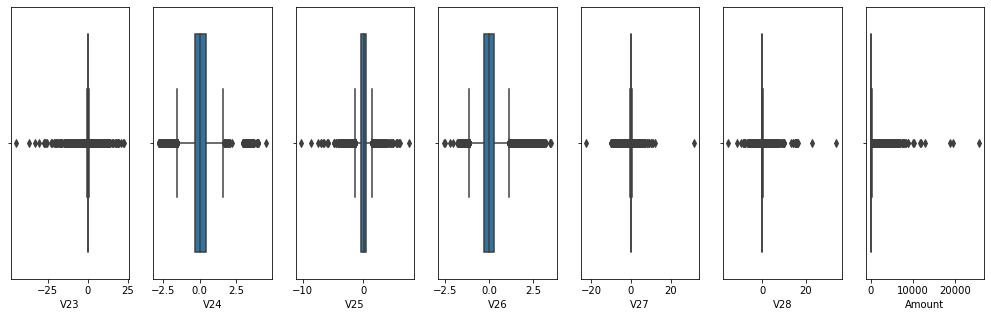

In [21]:
features1 = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']
features2 = ['V8', 'V9', 'V10', 'V11', 'V12', 'V13','V14', 'V15']
features3 = ['V16', 'V17', 'V18', 'V18', 'V19','V20', 'V21', 'V22']
features4 = ['V23', 'V24', 'V25', 'V26','V27','V28','Amount']

outlier(features1)
outlier(features2)
outlier(features3)
outlier(features4)

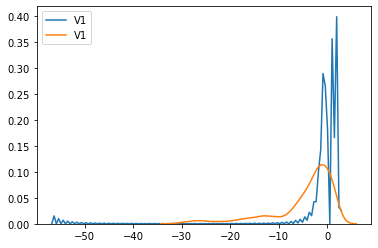

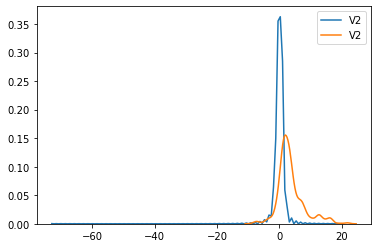

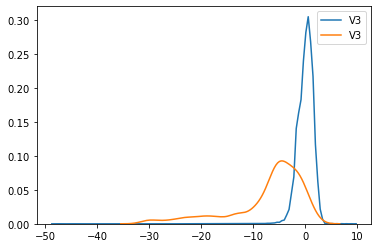

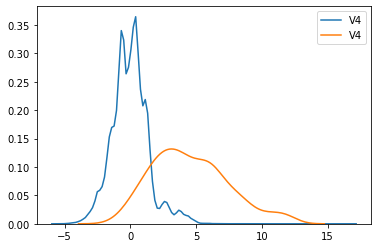

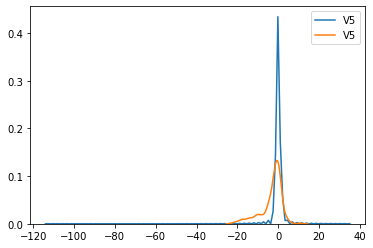

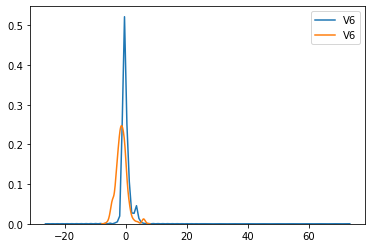

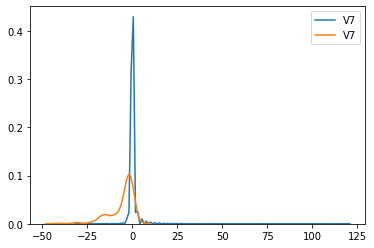

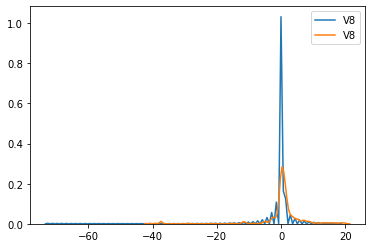

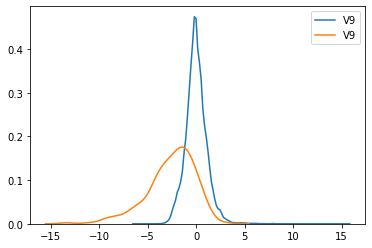

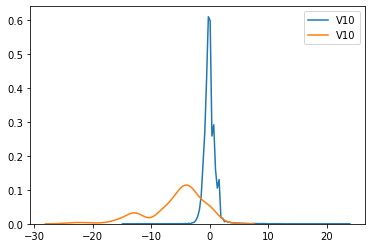

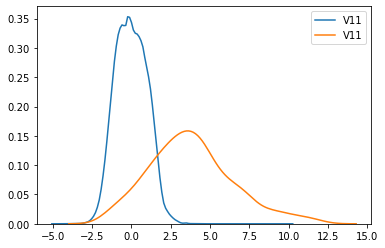

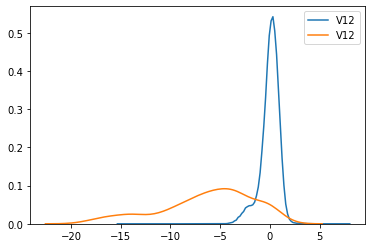

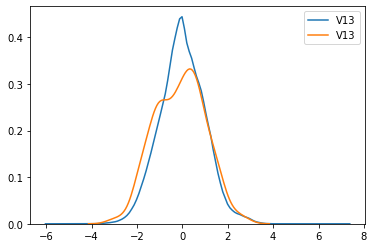

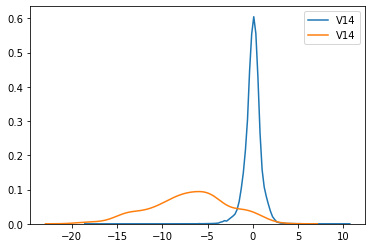

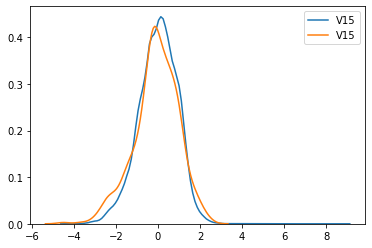

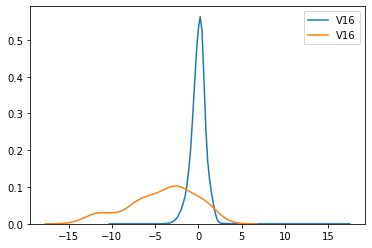

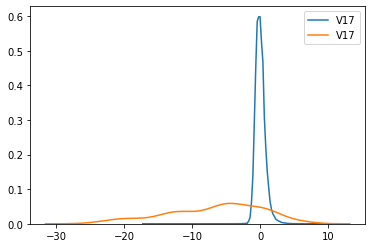

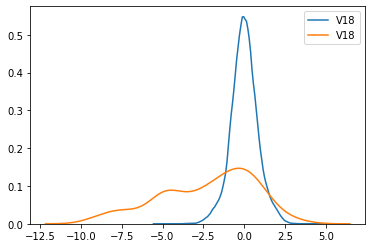

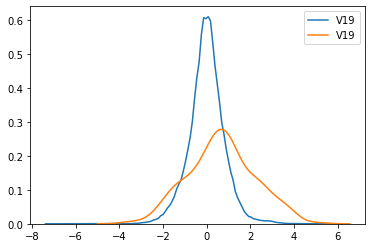

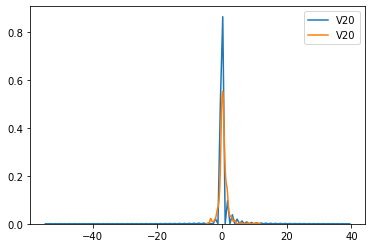

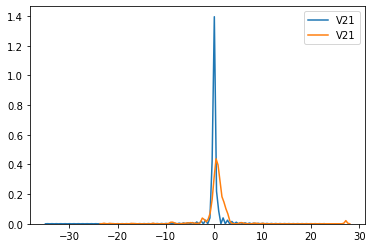

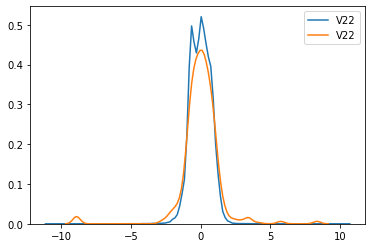

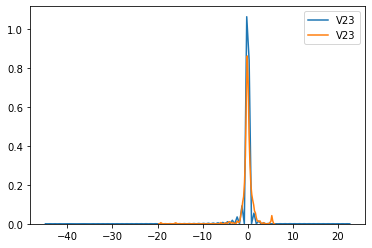

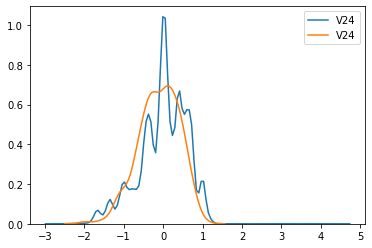

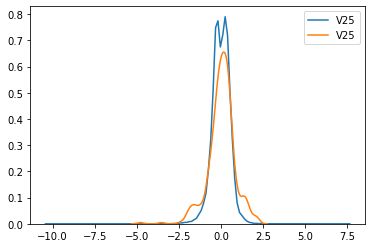

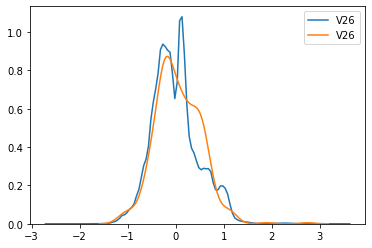

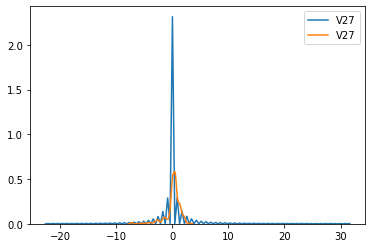

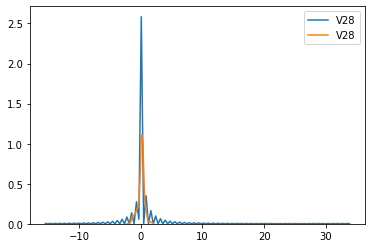

In [22]:
#Plotting the Kernel Distribution Estimate Plots, 
for j in list(creditcard_df):
    for i in range(2):
        if(j in ('Time','Amount','Class')):
            continue
        else:
            sns.kdeplot(creditcard_df[creditcard_df_2.Class==i][j])
    plt.show()

As when we have plotted the histogram plots for all the columns in the dataset, 
we have observed that there is skewness in some of the columns, i.e they are not gaussian 
To convert them into Gaussian we can apply **POWER TRANSFORMERS** on top of the dataset

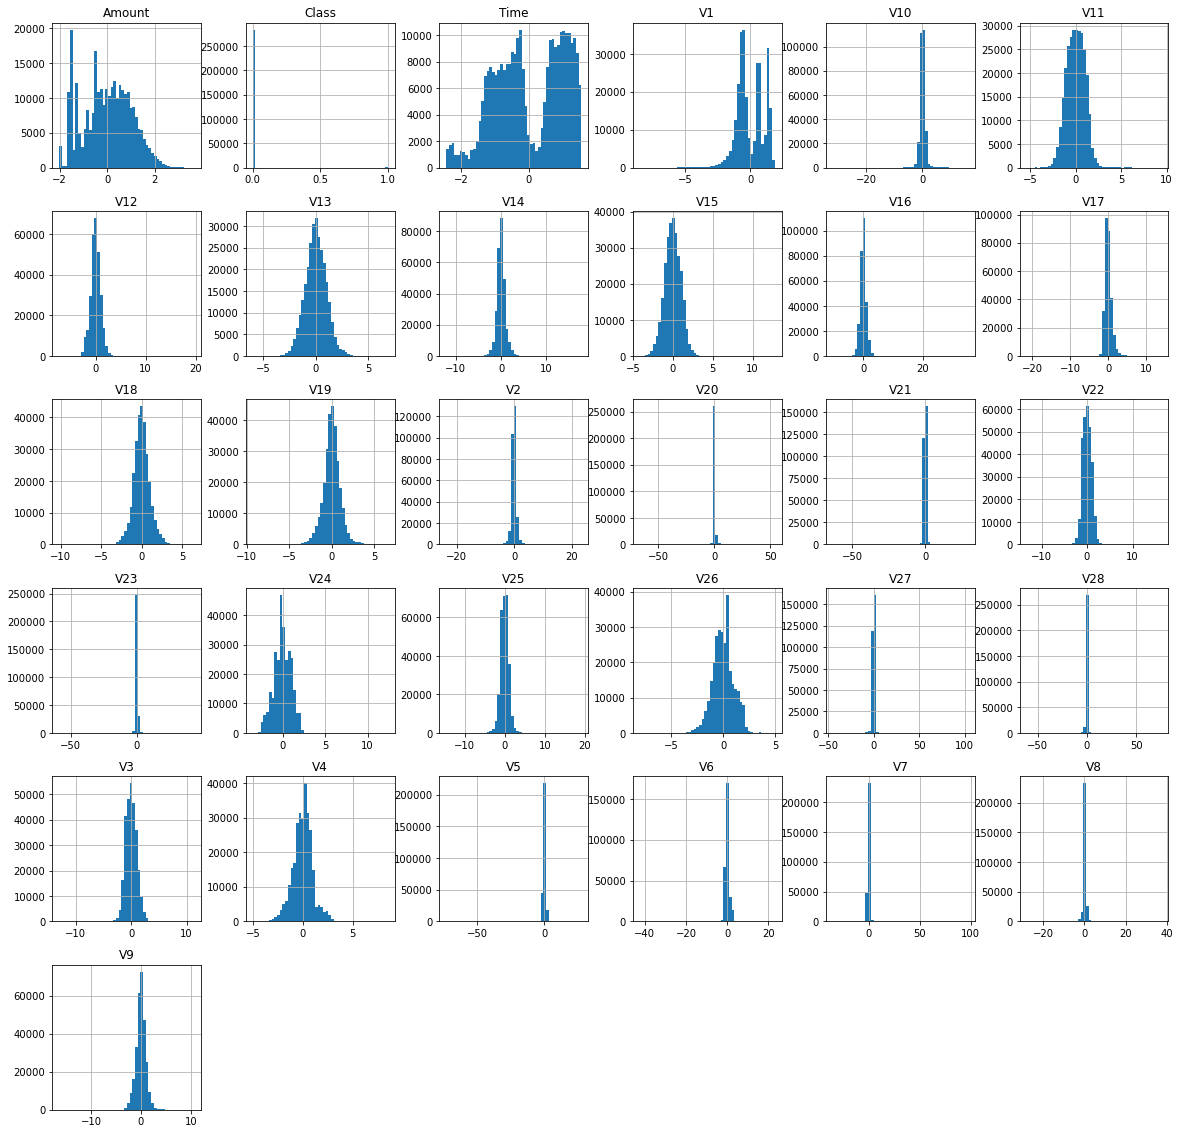

In [23]:

# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
Class_df = creditcard_df_2['Class']
creditcard_df_2.drop('Class', axis=1, inplace =True)
creditcard_df_2 = power.fit_transform(creditcard_df_2)
# histogram of the transformed data
creditcard_df_2 = pd.DataFrame(creditcard_df_2)
creditcard_df_2 = pd.concat([creditcard_df_2, Class_df], axis = 1)
creditcard_df_2.columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 
                           'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24',
                           'V25', 'V26', 'V27', 'V28', 'Amount','Class']
creditcard_df_2.hist(bins=50,figsize=(20,20))
plt.show()

### Scaling the dataset

As the data we have in hand is PCA'ed data, and for doing PCA the data should be scaled before. 
Keeping in mind the same we will proceed to scale the Time and Amount only. And also as observed in the box plots of the outlier detection section
we observed that almost all the features have the outliers, so using the Robust Scaler for scaling the Time and Amount as the Robust scaler is prone to presence of outliers 

In [24]:

from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

creditcard_df_2['scaled_amount'] = rob_scaler.fit_transform(creditcard_df_2['Amount'].values.reshape(-1,1))
creditcard_df_2['scaled_time'] = rob_scaler.fit_transform(creditcard_df_2['Time'].values.reshape(-1,1))

creditcard_df_2.drop(['Time','Amount'], axis=1, inplace=True)

In [25]:
creditcard_df_2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-0.904815,-0.131503,2.176074,0.983588,-0.256110,0.459227,0.193516,0.020305,0.380443,0.127074,-0.513088,-0.774671,-0.997398,-0.404755,1.711206,-0.600774,0.215544,0.009991,0.503467,0.323559,-0.007670,0.366644,-0.189647,0.015102,0.211929,-0.323884,0.323027,-0.053332,0,0.728303,-1.318770
1,0.626390,0.093067,-0.035062,0.387928,0.031947,0.045846,-0.063874,0.006711,-0.184488,-0.115195,1.523934,1.296242,0.498814,-0.232720,0.674890,0.491958,-0.175639,-0.238612,-0.169496,-0.093203,-0.298760,-0.884170,0.153342,-0.637483,0.288440,0.353130,-0.035793,0.057491,0,-0.770760,-1.318770
2,-0.904242,-0.871858,1.381297,0.341811,-0.374492,1.320901,0.639714,0.172348,-1.453859,0.234324,0.640742,-0.104954,0.724952,-0.255865,2.872435,-2.809663,1.383126,-0.165261,-2.838493,0.680896,0.357879,1.069496,1.501808,-1.133450,-0.653607,-0.209953,-0.151417,-0.173752,0,1.064652,-1.318621
3,-0.742857,-0.202760,1.401049,-0.581136,-0.019151,0.983351,0.191907,0.309141,-1.319689,-0.008922,-0.179270,0.026987,0.517344,-0.381222,-0.720269,-1.194700,-0.829186,2.435570,-1.528799,-0.273184,-0.133275,-0.013060,-0.317680,-1.756645,1.276336,-0.399896,0.144087,0.201524,0,0.657262,-1.318621
4,-0.823641,0.530197,1.160592,0.357540,-0.305614,0.187360,0.479194,-0.331706,0.769520,0.718432,-0.798770,0.496185,1.343525,-1.168769,0.138162,-0.580731,-0.319406,-0.066425,0.986458,0.528646,0.004660,1.107811,-0.232990,0.145885,-0.429239,1.053668,0.541488,0.669838,0,0.444141,-1.318489


### Splittng the Dataset into Train and Test using Stratified K-fold

As we have seen earlier the dataset is  highly class imbalanced, we need to ensure when we split the data into Train and Test we get the imbalance ration being preserved. 
So to preserve the imbalance ration, we are going to use Stratified K-fold which does the job here

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [27]:
class_count

0    284315
1       492
Name: Class, dtype: int64

In [28]:
print("Non-Fraud Transaction Percentage:", round(Non_Fraud,3))
Fraud=class_count[1]/creditcard_df_2['Class'].count()*100
print("Fraud Transaction Percentage:", round(Fraud,3))

Non-Fraud Transaction Percentage: 99.827
Fraud Transaction Percentage: 0.173


In [29]:
class_count = creditcard_df_2['Class'].value_counts()
Non_Fraud=class_count[0]/creditcard_df_2['Class'].count()*100
print("Non-Fraud Transaction Percentage:", round(Non_Fraud,3))
Fraud=class_count[1]/creditcard_df_2['Class'].count()*100
print("Fraud Transaction Percentage:", round(Fraud,3))

Non-Fraud Transaction Percentage: 99.827
Fraud Transaction Percentage: 0.173


In [30]:
X = creditcard_df_2.drop('Class', axis=1)
y = creditcard_df_2['Class']

In [31]:
skf = StratifiedKFold(n_splits=5, random_state=20, shuffle=False)

In [32]:
for train_index, test_index in skf.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    org_Xtrain, org_Xtest = X.iloc[train_index], X.iloc[test_index]
    org_ytrain, org_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [33]:
#Check the distribution of the splits
org_Xtrain_list = org_Xtrain.values
org_Xtest_list = org_Xtest.values
org_ytrain_list = org_ytrain.values
org_ytest_list = org_ytest.values

In [34]:
# To See if both the org_train and org_test are having the imbalance preserved
org_ytrain_unique_class, org_ytrain_class_counts = np.unique(org_ytrain_list, return_counts=True)
org_ytest_unique_class, org_ytest_class_counts = np.unique(org_ytest_list, return_counts=True)

Checking if the imbalance is being presevered after the stratified K-fold

In [35]:
print('Class Distributions after the split: \n')
a,b = 100*(org_ytrain_class_counts/ len(org_ytrain_list))
print("Non-Fraud Transaction Percentage in train:",a)
print("Fraud Transaction Percentage in train:",b)
c,d = 100*(org_ytest_class_counts/ len(org_ytest_list))
print("Non-Fraud Transaction Percentage in test:",c)
print("Fraud Transaction Percentage in test:",d)

Class Distributions after the split: 

Non-Fraud Transaction Percentage in train: 99.82707618303591
Fraud Transaction Percentage in train: 0.1729238169640898
Non-Fraud Transaction Percentage in test: 99.82795245869981
Fraud Transaction Percentage in test: 0.17204754130018785


### Building Decision Tree on Unbalanced Dataset

Building decsion tree using the below methods :
1. Taking the RFE'd columns from the original dataset and build Decsion Tree with and without Hyper Parameter tuning
2. Taking all columns from the original dataset and build Decsion Tree with and without Hyper Parameter tuning

In [36]:
#Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

In [37]:
dt_default = DecisionTreeClassifier()

In [38]:
# Running the RFE by considering to have 15 variables in o/p
rfe = RFE(dt_default, 15)           
rfe = rfe.fit(org_Xtrain, org_ytrain)
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
        True, False,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False, False, False])

In [39]:
list(zip(org_Xtrain.columns, rfe.support_, rfe.ranking_))

[('V1', True, 1),
 ('V2', False, 16),
 ('V3', False, 14),
 ('V4', True, 1),
 ('V5', False, 15),
 ('V6', False, 8),
 ('V7', False, 6),
 ('V8', False, 7),
 ('V9', False, 13),
 ('V10', True, 1),
 ('V11', False, 5),
 ('V12', True, 1),
 ('V13', True, 1),
 ('V14', True, 1),
 ('V15', True, 1),
 ('V16', False, 10),
 ('V17', True, 1),
 ('V18', False, 3),
 ('V19', True, 1),
 ('V20', True, 1),
 ('V21', False, 12),
 ('V22', True, 1),
 ('V23', False, 4),
 ('V24', True, 1),
 ('V25', True, 1),
 ('V26', True, 1),
 ('V27', True, 1),
 ('V28', False, 2),
 ('scaled_amount', False, 9),
 ('scaled_time', False, 11)]

In [40]:
cols = org_Xtrain.columns[rfe.support_]
cols

Index(['V1', 'V4', 'V10', 'V12', 'V13', 'V14', 'V15', 'V17', 'V19', 'V20',
       'V22', 'V24', 'V25', 'V26', 'V27'],
      dtype='object')

In [41]:
DT_RFE_Xtrain = org_Xtrain[cols]

In [42]:
DT_RFE_Xtest = org_Xtest[cols]

### Decision Tree with RFE'd features

In [43]:
dt_default = DecisionTreeClassifier()
dt_default.fit(DT_RFE_Xtrain, org_ytrain)

DecisionTreeClassifier()

In [44]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

# Making predictions
y_pred_default = dt_default.predict(DT_RFE_Xtest)

# Printing classification report
print(classification_report(org_ytest, y_pred_default))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.74      0.63      0.68        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.84     56961
weighted avg       1.00      1.00      1.00     56961



In [45]:
# Printing confusion matrix and accuracy
print(confusion_matrix(org_ytest,y_pred_default))
print("The precision score is {0}".format(100*precision_score(org_ytest,y_pred_default)))
print("The recall score is {0}".format(100*recall_score(org_ytest,y_pred_default)))

[[56841    22]
 [   36    62]]
The precision score is 73.80952380952381
The recall score is 63.26530612244898


As of now with a default Decision Tree it is found that we can get a 65% of recall score. we need to tune the hyperparameters to improve the Recall score. So that a actual fraudulent case would be identified as such 

### Hyper Parameter tuned Decision Tree With RFE'd features

In [46]:

# GridSearchCV to find optimal parameters
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [47]:
def gridSearchRFE(classifier):
    param_grid = {
    'max_depth': range(5, 15, 3),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
    }
    n_folds = 3

    grid_searchRFE = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, scoring = 'recall', n_jobs =-1)
    # Fit the grid search to the data
    grid_searchRFE.fit(DT_RFE_Xtrain, org_ytrain)
    return grid_searchRFE

In [48]:
# determining the classifier
classifier = DecisionTreeClassifier()
grid_searchRFE = gridSearchRFE(classifier)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   20.4s finished


In [49]:
cv_results = pd.DataFrame(grid_searchRFE.cv_results_)
# printing the optimal accuracy score and hyperparameters
print("best recall", grid_searchRFE.best_score_)
print(grid_searchRFE.best_estimator_)

best recall 0.7542987123139794
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=100)


In [50]:
# model with optimal hyperparameters
Imb_DT_RFE_HPT = DecisionTreeClassifier()
Imb_DT_RFE_HPT = DecisionTreeClassifier(criterion = "entropy",
                                  max_depth=11, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
Imb_DT_RFE_HPT.fit(DT_RFE_Xtrain, org_ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=50,
                       min_samples_split=50)

In [51]:
# Making predictions
y_pred_RFE_hpt = Imb_DT_RFE_HPT.predict(DT_RFE_Xtest)

# Printing classification report
print(classification_report(org_ytest, y_pred_RFE_hpt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.84      0.65      0.74        98

    accuracy                           1.00     56961
   macro avg       0.92      0.83      0.87     56961
weighted avg       1.00      1.00      1.00     56961



Observations:
    - Recall: 65% 
    - F-1 Score: 74%

### Hyper Parameter tuned Decision Tree

In [52]:
def gridSearch(classifier):
    param_grid = {
    'max_depth': range(5, 100, 20),
    'min_samples_leaf': range(50, 150, 30),
    'min_samples_split': range(50, 150, 30),
    'criterion': ["entropy", "gini"]
    }
    n_folds = 3

    grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, scoring = 'recall', n_jobs =-1)
    # Fit the grid search to the data
    grid_search.fit(org_Xtrain, org_ytrain)
    return grid_search

In [53]:
# determining the classifier
classifier = DecisionTreeClassifier()
grid_search = gridSearch(classifier)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.4min finished


In [54]:
cv_results = pd.DataFrame(grid_search.cv_results_)
# printing the optimal accuracy score and hyperparameters
print("best recall", grid_search.best_score_)
print(grid_search.best_estimator_)

best recall 0.7593877708381526
DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=50,
                       min_samples_split=110)


In [55]:
# model with optimal hyperparameters
Imb_DT_HPT1 = DecisionTreeClassifier()
Imb_DT_HPT1 = DecisionTreeClassifier(criterion = "entropy",
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=110)
Imb_DT_HPT1.fit(org_Xtrain, org_ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=110)

In [56]:

# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

# Making predictions
y_pred_hpt = Imb_DT_HPT1.predict(org_Xtest)

# Printing classification report
print(classification_report(org_ytest, y_pred_hpt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.84      0.66      0.74        98

    accuracy                           1.00     56961
   macro avg       0.92      0.83      0.87     56961
weighted avg       1.00      1.00      1.00     56961



Observations:
    - Recall: 66% 
    - F-1 Score: 74%

##### NOTE
Changing the ranges of the different parameters in the Hyper Parametes by iteratively running the GridsearchCV 

In [57]:
def gridSearchMDMSLMSSC(classifier):
    param_grid = {
    'max_depth': range(10, 50, 10),
    'min_samples_leaf': range(15,35, 5),
    'min_samples_split': range(50, 100, 10),
    'criterion': ["entropy", "gini"]
    }
    n_folds = 5

    grid_search_mdmslmssc = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, scoring = 'recall', n_jobs =-1)
    # Fit the grid search to the dat2
    grid_search_mdmslmssc.fit(org_Xtrain, org_ytrain)
    return grid_search_mdmslmssc

In [58]:
# determining the classifier
classifier = DecisionTreeClassifier()
grid_search_mdmslmssc = gridSearchMDMSLMSSC(classifier)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  7.9min finished


In [59]:
cv_results_mdmslmssc = pd.DataFrame(grid_search_mdmslmssc.cv_results_)
# printing the optimal accuracy score and hyperparameters
print("best recall", grid_search_mdmslmssc.best_score_)
print(grid_search_mdmslmssc.best_estimator_)

best recall 0.79957805907173
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=30,
                       min_samples_split=70)


Running the model with best parameters obtained from grid search.

In [60]:
# model with optimal hyperparameters
Imb_DT_HPT = DecisionTreeClassifier()
Imb_DT_HPT = DecisionTreeClassifier(criterion = "entropy",
                                  max_depth=10, 
                                  min_samples_leaf=30,
                                  min_samples_split=70)
Imb_DT_HPT.fit(org_Xtrain, org_ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=30,
                       min_samples_split=70)

In [61]:

# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

# Making predictions
y_pred_hpt = Imb_DT_HPT.predict(org_Xtest)

# Printing classification report
print(classification_report(org_ytest, y_pred_hpt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.84      0.71      0.77        98

    accuracy                           1.00     56961
   macro avg       0.92      0.86      0.89     56961
weighted avg       1.00      1.00      1.00     56961



Observations:
    - Recall: 71% 
    - F-1 Score: 77%

## Default Random Forest

In [62]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [63]:
# fit
rfc.fit(org_Xtrain, org_ytrain)

RandomForestClassifier()

In [64]:
# Making predictions
predictions = rfc.predict(org_Xtest)
# Let's check the report of our default model
print(classification_report(org_ytest,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961



Observations:
    - Recall: 69% 
    - F-1 Score: 80%

### Hyper parameter Tuned Random Forest

In [65]:
def gridSearchRFC(classifier, param_grid):
    # Instantiate the grid search model
    grid_search_RFC = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring = 'recall')
    # Fit the grid search to the data
    grid_search_RFC.fit(org_Xtrain, org_ytrain)
    return grid_search_RFC

In [66]:
classifier = RandomForestClassifier()
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
    }
gridSearchRFC = gridSearchRFC(classifier, param_grid)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 38.4min finished


In [67]:
cv_resultsRFC = pd.DataFrame(gridSearchRFC.cv_results_)
# printing the optimal accuracy score and hyperparameters
print("best recall", gridSearchRFC.best_score_)
print(gridSearchRFC.best_estimator_)

best recall 0.6071208265864755
RandomForestClassifier(max_depth=4, max_features=10, min_samples_leaf=100,
                       min_samples_split=200)


In [68]:
# Making predictions
predictions = gridSearchRFC.predict(org_Xtest)
# Let's check the report of our default model
print(classification_report(org_ytest,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.39      0.55        98

    accuracy                           1.00     56961
   macro avg       0.99      0.69      0.78     56961
weighted avg       1.00      1.00      1.00     56961



This is clearly overfitting

## K Nearest Neighbors

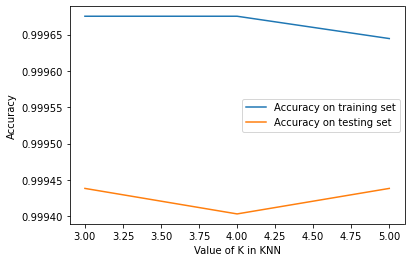

In [69]:
k_range = range(3, 6)
score1=[]
score2=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(org_Xtrain,org_ytrain)
    score1.append(knn.score(org_Xtrain,org_ytrain))
    score2.append(knn.score(org_Xtest,org_ytest))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [70]:
knn=KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(org_Xtrain,org_ytrain)
print('Accuracy of KNN n=5 on the testing dataset is :{:.3f}'.format(knn.score(org_Xtest,org_ytest)))

Accuracy of KNN n=5 on the testing dataset is :0.999


In [71]:
y_pred_KNN =knn.predict(org_Xtest)

In [72]:
print('BEST K-NEAREST NEIGHBORS MODEL')
print('Accuracy Score - KNN:', metrics.accuracy_score(org_ytest, y_pred_KNN))  
print('Average Precision - KNN:', metrics.average_precision_score(org_ytest, y_pred_KNN)) 
print('F1 Score - KNN:', metrics.f1_score(org_ytest, y_pred_KNN)) 
print('Precision - KNN:', metrics.precision_score(org_ytest, y_pred_KNN)) 
print('Recall - KNN:', metrics.recall_score(org_ytest, y_pred_KNN))
print('ROC Score - KNN:', roc_auc_score(org_ytest, y_pred_KNN))

BEST K-NEAREST NEIGHBORS MODEL
Accuracy Score - KNN: 0.9994382121100402
Average Precision - KNN: 0.6752540182344597
F1 Score - KNN: 0.8117647058823529
Precision - KNN: 0.9583333333333334
Recall - KNN: 0.7040816326530612
ROC Score - KNN: 0.8520144371344375


## XG Boost

In [73]:
XGB_def =XGBClassifier()
XGB_def.fit(org_Xtrain,org_ytrain)
y_pred_xgb_def =XGB_def.predict(org_Xtest)
print('Precision - XGB:', metrics.precision_score(org_ytest, y_pred_xgb_def)) 
print('Recall - XGB:', metrics.recall_score(org_ytest, y_pred_xgb_def))
print(classification_report(org_ytest, y_pred_xgb_def))

Precision - XGB: 0.9852941176470589
Recall - XGB: 0.6836734693877551
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961



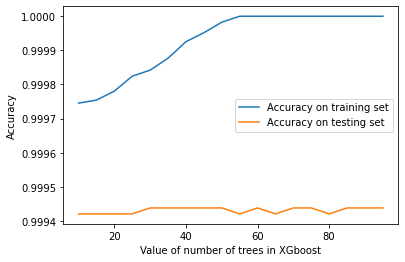

In [74]:
tree_range = range(10, 100, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree, n_jobs=-1)
    xgb.fit(org_Xtrain,org_ytrain)
    score1.append(xgb.score(org_Xtrain,org_ytrain))
    score2.append(xgb.score(org_Xtest,org_ytest))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [75]:
def gridSearchXGB(classifier, param_grid):
    # Instantiate the grid search model
    grid_search_XGB = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring = 'recall')
    # Fit the grid search to the data
    grid_search_XGB.fit(org_Xtrain, org_ytrain)
    return grid_search_XGB

In [76]:
classifier = XGBClassifier()
param_grid = {
    'n_estimators': range(10,60, 10),
    'max_depth': range(4, 40, 4)
    }
gridSearchXGB = gridSearchXGB(classifier, param_grid)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  4.1min finished


In [77]:
cv_resultsXGB = pd.DataFrame(gridSearchXGB.cv_results_)
# printing the optimal accuracy score and hyperparameters
print("best recall", gridSearchXGB.best_score_)
print(gridSearchXGB.best_estimator_)

best recall 0.8023941707147814
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [78]:
# Making predictions using the tuned hyper parameters
XGB_HPT= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGB_HPT.fit(org_Xtrain,org_ytrain)
y_pred_train = XGB_HPT.predict(org_Xtrain)
y_pred_test =XGB_HPT.predict(org_Xtest)
print('Training Recall - XGB:', metrics.recall_score(org_ytrain, y_pred_train)) 
print('Testing Recall - XGB:', metrics.recall_score(org_ytest, y_pred_test))

print('Train Classfication report')
print(classification_report(org_ytrain, y_pred_train))

print('Test Classificaton report')
print(classification_report(org_ytest, y_pred_test))

Training Recall - XGB: 0.8553299492385786
Testing Recall - XGB: 0.7142857142857143
Train Classfication report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227452
           1       0.99      0.86      0.92       394

    accuracy                           1.00    227846
   macro avg       0.99      0.93      0.96    227846
weighted avg       1.00      1.00      1.00    227846

Test Classificaton report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.71      0.81        98

    accuracy                           1.00     56961
   macro avg       0.97      0.86      0.90     56961
weighted avg       1.00      1.00      1.00     56961



### Logistic Regresssion on Imbalance data

In [79]:
# Performing Hyper-parameter tuning and Cross-validation

from sklearn.linear_model import LogisticRegression
grid={'C':np.arange(0.001, 0.1, 0.02), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg=LogisticRegression(random_state=42, n_jobs=-1)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(org_Xtrain,org_ytrain)

print("Tuned hyperparameters :(Best parameters): ",logreg_cv.best_params_)


Tuned hyperparameters :(Best parameters):  {'C': 0.021, 'penalty': 'l2'}


In [80]:
log_cv_results_df = pd.DataFrame(logreg_cv.cv_results_)

In [81]:
logreg_cv.best_estimator_.get_params()

{'C': 0.021,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [82]:
# fitting the model on train set using best estimator
logreg.set_params(**logreg_cv.best_estimator_.get_params())
logreg.set_params(class_weight='balanced', solver = 'sag')

LogisticRegression(C=0.021, class_weight='balanced', n_jobs=-1, random_state=42,
                   solver='sag')

In [83]:
logreg_train_imb = logreg.fit(org_Xtrain, org_ytrain)

In [84]:
# predicting on train data set
y_logreg_train_imb_pred_prob = logreg_train_imb.predict_proba(org_Xtrain)[:,1]
y_logreg_train_imb_pred_prob

array([0.3714427 , 0.02661648, 0.03118092, ..., 0.06938481, 0.00146284,
       0.27229721])

In [85]:
# Assigning a coloumn to predicted probabilities in dataframe

y_logreg_train_imb_pred = pd.DataFrame(org_ytrain)
y_logreg_train_imb_pred['Class_probability'] = y_logreg_train_imb_pred_prob
print(y_logreg_train_imb_pred.shape)
y_logreg_train_imb_pred.head()

(227846, 2)


,Class,Class_probability
0,0,0.371443
1,0,0.026616
2,0,0.031181
3,0,0.038175
4,0,0.077077


In [86]:
y_logreg_train_imb_pred = y_logreg_train_imb_pred.rename(columns={ 0 : 'Class'})

In [87]:
y_logreg_train_imb_pred.head()

,Class,Class_probability
0,0,0.371443
1,0,0.026616
2,0,0.031181
3,0,0.038175
4,0,0.077077


In [88]:
def plot_ROC(actual, proba):
    fpr, tpr, thresholds = metrics.roc_curve( actual, proba,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, proba)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC_curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR (or) [1 - Specificity]')
    plt.ylabel('Sensitivity')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [89]:
fpr, tpr, thresholds = metrics.roc_curve( y_logreg_train_imb_pred.Class, y_logreg_train_imb_pred.Class_probability, drop_intermediate = False )

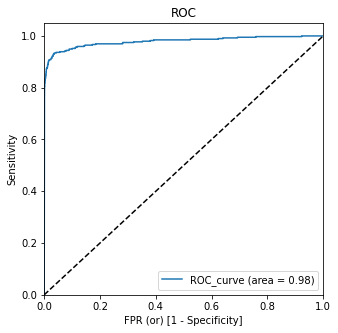

In [90]:
plot_ROC(y_logreg_train_imb_pred.Class,y_logreg_train_imb_pred.Class_probability)

In [91]:
# Creating columns with different probabilities

numbers = [float(x)/10 for x in range(10)]
for n in numbers:
    y_logreg_train_imb_pred[n]= y_logreg_train_imb_pred.Class_probability.map(lambda x: 1 if x > n else 0)
y_logreg_train_imb_pred.head()

,Class,Class_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.371443,1,1,1,1,0,0,0,0,0,0
1,0,0.026616,1,0,0,0,0,0,0,0,0,0
2,0,0.031181,1,0,0,0,0,0,0,0,0,0
3,0,0.038175,1,0,0,0,0,0,0,0,0,0
4,0,0.077077,1,0,0,0,0,0,0,0,0,0


In [92]:
# Calculating Sensitivity, Specificity and Accuracy at various Probability cutoffs
# Importing confusion_matrix from sklearn

cutoff_prob_imb_df = pd.DataFrame(columns = ['Probability', 'Sensitivity','Specificity','Accuracy'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cfm = metrics.confusion_matrix(y_logreg_train_imb_pred.Class, y_logreg_train_imb_pred[i] )
    total=sum(sum(cfm))
    Sensitivity = cfm[1,1]/(cfm[1,0]+cfm[1,1])
    Specificity = cfm[0,0]/(cfm[0,0]+cfm[0,1])
    Accuracy = (cfm[0,0]+cfm[1,1])/total    
    cutoff_prob_imb_df.loc[i] = [i, Sensitivity, Specificity, Accuracy]
cutoff_prob_imb_df

,Probability,Sensitivity,Specificity,Accuracy
0.0,0.0,1.000000,0.000000,0.001729
0.1,0.1,0.967005,0.825818,0.826062
0.2,0.2,0.949239,0.901878,0.901960
0.3,0.3,0.939086,0.935230,0.935237
0.4,0.4,0.936548,0.954197,0.954166
0.5,0.5,0.928934,0.966169,0.966104
0.6,0.6,0.913706,0.974135,0.974031
0.7,0.7,0.908629,0.980220,0.980096
0.8,0.8,0.898477,0.985285,0.985135
0.9,0.9,0.875635,0.990429,0.990230


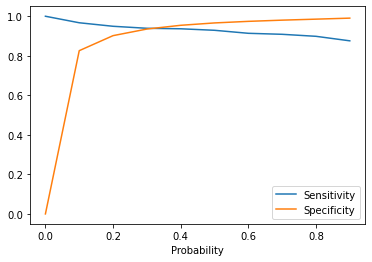

In [93]:
# Plotting Sensitivity and Specificity for various probabilities.

cutoff_prob_imb_df.plot.line(x='Probability', y=['Sensitivity','Specificity'])
plt.show()

In [94]:
ct_val = 0.3
y_logreg_train_imb_pred['predicted_outcome']=y_logreg_train_imb_pred.Class_probability.map(lambda x: 1 if x > ct_val else 0)
y_logreg_train_imb_pred.head(10)

,Class,Class_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_outcome
0,0,0.371443,1,1,1,1,0,0,0,0,0,0,1
1,0,0.026616,1,0,0,0,0,0,0,0,0,0,0
2,0,0.031181,1,0,0,0,0,0,0,0,0,0,0
3,0,0.038175,1,0,0,0,0,0,0,0,0,0,0
4,0,0.077077,1,0,0,0,0,0,0,0,0,0,0
5,0,0.052035,1,0,0,0,0,0,0,0,0,0,0
6,0,0.220070,1,1,1,0,0,0,0,0,0,0,0
7,0,0.131403,1,1,0,0,0,0,0,0,0,0,0
8,0,0.032470,1,0,0,0,0,0,0,0,0,0,0
9,0,0.026757,1,0,0,0,0,0,0,0,0,0,0


In [95]:
# Finding Confusion matrix
confusion_matrix_train_imb_1 = metrics.confusion_matrix(y_logreg_train_imb_pred.Class,y_logreg_train_imb_pred.predicted_outcome)
confusion_matrix_train_imb_1

array([[212720,  14732],
       [    24,    370]], dtype=int64)

In [96]:
TN = confusion_matrix_train_imb_1[0,0] # True Negatives
FP = confusion_matrix_train_imb_1[0,1] # False Positives
FN = confusion_matrix_train_imb_1[1,0] # False Negatives
TP = confusion_matrix_train_imb_1[1,1] # True Positives

In [97]:
## Overall Accuracy of train model in percentage
print("\n Logistic Regression - Accuracy % for Train: ", round(metrics.accuracy_score(y_logreg_train_imb_pred.Class, y_logreg_train_imb_pred.predicted_outcome)*100,3))


 Logistic Regression - Accuracy % for Train:  93.524


In [98]:
print("Sensitivity for Train:",round(TP / float(TP+FN)*100,2))
print("Specificity for Train:",round(TN / float(TN+FP)*100,2))
print('False Positive Rate for Train: ', round(FP/ float(TN+FP)*100,2)) # predicting Fraud when user has been Non-Fraud
print ('Positive Predictive Value for Train: ', round(TP / float(TP+FP)*100,2))
print ('Negative Predictive Value for Train: ', round(TN / float(TN+FN)*100,2))
print("Recall_Score for Train:", round(recall_score(y_logreg_train_imb_pred.Class, y_logreg_train_imb_pred.predicted_outcome)*100,2))

Sensitivity for Train: 93.91
Specificity for Train: 93.52
False Positive Rate for Train:  6.48
Positive Predictive Value for Train:  2.45
Negative Predictive Value for Train:  99.99
Recall_Score for Train: 93.91


In [99]:
# Making predictions on Test data
y_logreg_imb_pred_test = logreg_train_imb.predict(org_Xtest)

In [100]:
# Deriving Confusion matrix for the test dataset

logreg_confusion_imb_test = metrics.confusion_matrix(org_ytest,y_logreg_imb_pred_test)
print('Confusion Matrix_imb_Test: ', '\n')
print(logreg_confusion_imb_test)

Confusion Matrix_imb_Test:  

[[55513  1350]
 [   12    86]]


In [101]:
#Overall Accuracy of test model in percentage

print("\n Logistic Regression - Accuracy in % : ", round(metrics.accuracy_score(org_ytest, y_logreg_imb_pred_test)*100,4))


 Logistic Regression - Accuracy in % :  97.6089


In [102]:
# Assigning each element in Confusion_Matrix to variables
TN = logreg_confusion_imb_test[0,0] # True Negatives
FP = logreg_confusion_imb_test[0,1] # False Positives
FN = logreg_confusion_imb_test[1,0] # False Negatives
TP = logreg_confusion_imb_test[1,1] # True Positives

In [103]:
print("Sensitivity:",round(TP / float(TP+FN)*100,2))
print("Specificity:",round(TN / float(TN+FP)*100,2))
print('False Positive Rate : ', round(FP/ float(TN+FP)*100,2)) # predicting Fraud when user has been Non-Fraud
print ('Positive Predictive Value : ', round(TP / float(TP+FP)*100,2))
print ('Negative Predictive Value : ', round(TN / float(TN+FN)*100,2))
print("Recall_Score:", round(recall_score(org_ytest, y_logreg_imb_pred_test)*100,2))

Sensitivity: 87.76
Specificity: 97.63
False Positive Rate :  2.37
Positive Predictive Value :  5.99
Negative Predictive Value :  99.98
Recall_Score: 87.76


# Imbalance handling using SMOTE

In [104]:
# Applying SMOTE(Synthetic Minority Oversampling Technique) on the train dataset for handing the class imbalance in the data
# Importing necessary packages for SMOTE

from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state = 42)

X_train_smt,y_train_smt = smt.fit_sample(org_Xtrain,org_ytrain)

print("X_train_smt Shape", X_train_smt.shape)
print("y_train_smt Shape", y_train_smt.shape)

imbalance = (y_train_smt != 0).sum()/(y_train_smt == 0).sum()
print("Imbalance in the Train Data : ",imbalance)

X_train_smt Shape (454904, 30)
y_train_smt Shape (454904,)
Imbalance in the Train Data :  1.0


In [105]:
#Converting them into a dataframe
X_train_smt = pd.DataFrame(X_train_smt)
y_train_smt = pd.DataFrame(y_train_smt)

In [106]:
org_Xtrain_cols = org_Xtrain.columns

In [107]:
# Transforming the arrays into dataframes 'X_train_smt_bal' and 'y_train_smt_bal'

X_train_smt_bal = pd.DataFrame(X_train_smt, columns=org_Xtrain_cols)
y_train_smt_bal = pd.DataFrame(y_train_smt, columns=['Class'])

display(X_train_smt_bal.head())
display(y_train_smt_bal.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
0,-0.904815,-0.131503,2.176074,0.983588,-0.256110,0.459227,0.193516,0.020305,0.380443,0.127074,-0.513088,-0.774671,-0.997398,-0.404755,1.711206,-0.600774,0.215544,0.009991,0.503467,0.323559,-0.007670,0.366644,-0.189647,0.015102,0.211929,-0.323884,0.323027,-0.053332,0.728303,-1.318770
1,0.626390,0.093067,-0.035062,0.387928,0.031947,0.045846,-0.063874,0.006711,-0.184488,-0.115195,1.523934,1.296242,0.498814,-0.232720,0.674890,0.491958,-0.175639,-0.238612,-0.169496,-0.093203,-0.298760,-0.884170,0.153342,-0.637483,0.288440,0.353130,-0.035793,0.057491,-0.770760,-1.318770
2,-0.904242,-0.871858,1.381297,0.341811,-0.374492,1.320901,0.639714,0.172348,-1.453859,0.234324,0.640742,-0.104954,0.724952,-0.255865,2.872435,-2.809663,1.383126,-0.165261,-2.838493,0.680896,0.357879,1.069496,1.501808,-1.133450,-0.653607,-0.209953,-0.151417,-0.173752,1.064652,-1.318621
3,-0.742857,-0.202760,1.401049,-0.581136,-0.019151,0.983351,0.191907,0.309141,-1.319689,-0.008922,-0.179270,0.026987,0.517344,-0.381222,-0.720269,-1.194700,-0.829186,2.435570,-1.528799,-0.273184,-0.133275,-0.013060,-0.317680,-1.756645,1.276336,-0.399896,0.144087,0.201524,0.657262,-1.318621
4,-0.823641,0.530197,1.160592,0.357540,-0.305614,0.187360,0.479194,-0.331706,0.769520,0.718432,-0.798770,0.496185,1.343525,-1.168769,0.138162,-0.580731,-0.319406,-0.066425,0.986458,0.528646,0.004660,1.107811,-0.232990,0.145885,-0.429239,1.053668,0.541488,0.669838,0.444141,-1.318489


,Class
0,0
1,0
2,0
3,0
4,0


In [108]:
print("X_train_smt_bal :", X_train_smt_bal.shape)
print("y_train_smt_bal :", y_train_smt_bal.shape)

X_train_smt_bal : (454904, 30)
y_train_smt_bal : (454904, 1)


In [109]:
y_train_smt_bal['Class'].value_counts()

1    227452
0    227452
Name: Class, dtype: int64

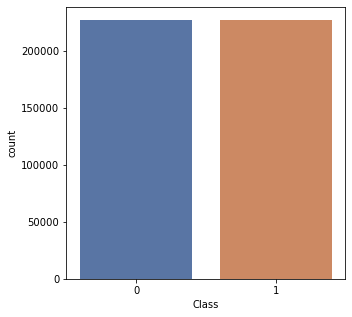

In [110]:
#plotting the dist plot to check if the imbalance has been resolved
y_train_smt_df = pd.DataFrame(y_train_smt)
#Plot a count plot based on the target variable 'class'
plt.figure(figsize=(5,5))
sns.countplot(x = "Class", palette='deep', data = y_train_smt_df )
plt.xticks(rotation = 0)
plt.show()

###  Logistic Regression on SMOTE balanced Dataset

In [111]:

grid={'C':np.arange(0.001, 0.1, 0.02), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg_smt_bal=LogisticRegression(random_state=42, n_jobs=-1)
logreg_smt_cv=GridSearchCV(logreg,grid,cv=10)
logreg_smt_cv.fit(X_train_smt_bal,y_train_smt_bal)

print("Tuned hyperparameters :(Best parameters): ", logreg_smt_cv.best_params_)


Tuned hyperparameters :(Best parameters):  {'C': 0.001, 'penalty': 'l2'}


In [112]:
logreg_cv_smt_bal_result_df = pd.DataFrame(logreg_cv.cv_results_)

In [113]:
logreg_smt_cv.best_estimator_.get_params()

{'C': 0.001,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'sag',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [114]:
# fitting the model on train set using the best estimator
logreg_smt_bal.set_params(**logreg_smt_cv.best_estimator_.get_params())
logreg_smt_bal.set_params(class_weight='balanced', solver = 'sag')

LogisticRegression(C=0.001, class_weight='balanced', n_jobs=-1, random_state=42,
                   solver='sag')

In [115]:
logreg_train_smt_bal = logreg_smt_bal.fit(X_train_smt_bal, y_train_smt_bal)

In [116]:
# predicting on train data set
y_logreg_train_smt_bal_pred_prob = logreg_train_smt_bal.predict_proba(X_train_smt_bal)[:,1]
y_logreg_train_smt_bal_pred_prob


array([0.39308734, 0.05906387, 0.34455748, ..., 0.99998817, 1.        ,
       0.99999983])

In [117]:
## Assigning a coloumn to predicted probabilities in dataframe

y_logreg_train_smt_bal_pred = pd.DataFrame(y_train_smt_bal)
y_logreg_train_smt_bal_pred['Class_probability'] = y_logreg_train_smt_bal_pred_prob
print(y_logreg_train_smt_bal_pred.shape)
y_logreg_train_smt_bal_pred.head()


(454904, 2)


,Class,Class_probability
0,0,0.393087
1,0,0.059064
2,0,0.344557
3,0,0.097925
4,0,0.049063


In [118]:
y_logreg_train_smt_bal_pred = y_logreg_train_smt_bal_pred.rename(columns={ 0 : 'Class'})

In [119]:
y_logreg_train_smt_bal_pred.head()

,Class,Class_probability
0,0,0.393087
1,0,0.059064
2,0,0.344557
3,0,0.097925
4,0,0.049063


In [120]:
fpr, tpr, thresholds = metrics.roc_curve( y_logreg_train_smt_bal_pred.Class, y_logreg_train_smt_bal_pred.Class_probability, drop_intermediate = False )

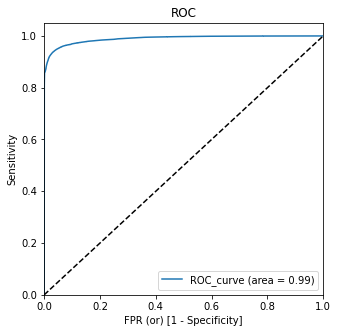

In [121]:
plot_ROC(y_logreg_train_smt_bal_pred.Class,y_logreg_train_smt_bal_pred.Class_probability)

In [122]:
# Creating columns with different probabilities

numbers = [float(x)/10 for x in range(10)]
for n in numbers:
    y_logreg_train_smt_bal_pred[n]= y_logreg_train_smt_bal_pred.Class_probability.map(lambda x: 1 if x > n else 0)
y_logreg_train_smt_bal_pred.head()

,Class,Class_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.393087,1,1,1,1,0,0,0,0,0,0
1,0,0.059064,1,0,0,0,0,0,0,0,0,0
2,0,0.344557,1,1,1,1,0,0,0,0,0,0
3,0,0.097925,1,0,0,0,0,0,0,0,0,0
4,0,0.049063,1,0,0,0,0,0,0,0,0,0


In [123]:
# Calculating Sensitivity, Specificity and Accuracy at various Probability cutoffs
# Importing confusion_matrix from sklearn

cutoff_prob_smt_bal_df = pd.DataFrame(columns = ['Probability', 'Sensitivity','Specificity','Accuracy'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cfm = metrics.confusion_matrix(y_logreg_train_smt_bal_pred.Class, y_logreg_train_smt_bal_pred[i] )
    total=sum(sum(cfm))
    Sensitivity = cfm[1,1]/(cfm[1,0]+cfm[1,1])
    Specificity = cfm[0,0]/(cfm[0,0]+cfm[0,1])
    Accuracy = (cfm[0,0]+cfm[1,1])/total    
    cutoff_prob_smt_bal_df.loc[i] = [i, Sensitivity, Specificity, Accuracy]
cutoff_prob_smt_bal_df

,Probability,Sensitivity,Specificity,Accuracy
0.0,0.0,1.000000,0.000000,0.500000
0.1,0.1,0.984757,0.785603,0.885180
0.2,0.2,0.966041,0.911920,0.938981
0.3,0.3,0.948965,0.954478,0.951722
0.4,0.4,0.935041,0.970798,0.952920
0.5,0.5,0.922819,0.979802,0.951311
0.6,0.6,0.908790,0.985474,0.947132
0.7,0.7,0.896514,0.989316,0.942915
0.8,0.8,0.884253,0.992231,0.938242
0.9,0.9,0.867308,0.995261,0.931284


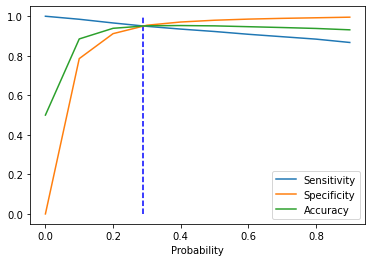

In [124]:
# Plotting Sensitivity and Specificity for various probabilities.
cutoff_prob_smt_bal_df.plot.line(x='Probability', y=['Sensitivity','Specificity','Accuracy'])
plt.vlines(x=0.29, ymax=1, ymin=0, colors="b", linestyles="--")
plt.savefig("Cutoff point",bbox_inches='tight')
plt.show()

In [125]:
ct_val = 0.29
y_logreg_train_smt_bal_pred['Predicted_outcome']=y_logreg_train_smt_bal_pred.Class_probability.map(lambda x: 1 if x > ct_val else 0)
y_logreg_train_smt_bal_pred.head(10)

,Class,Class_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_outcome
0,0,0.393087,1,1,1,1,0,0,0,0,0,0,1
1,0,0.059064,1,0,0,0,0,0,0,0,0,0,0
2,0,0.344557,1,1,1,1,0,0,0,0,0,0,1
3,0,0.097925,1,0,0,0,0,0,0,0,0,0,0
4,0,0.049063,1,0,0,0,0,0,0,0,0,0,0
5,0,0.083002,1,0,0,0,0,0,0,0,0,0,0
6,0,0.245285,1,1,1,0,0,0,0,0,0,0,0
7,0,0.077431,1,0,0,0,0,0,0,0,0,0,0
8,0,0.039729,1,0,0,0,0,0,0,0,0,0,0
9,0,0.041597,1,0,0,0,0,0,0,0,0,0,0


In [126]:
# Finding Confusion matrix
confusion_matrix_train_smt_bal_1 = metrics.confusion_matrix(y_logreg_train_smt_bal_pred.Class,y_logreg_train_smt_bal_pred.Predicted_outcome)
confusion_matrix_train_smt_bal_1

array([[216509,  10943],
       [ 11268, 216184]], dtype=int64)

In [127]:
TN = confusion_matrix_train_smt_bal_1[0,0] # True Negatives
FP = confusion_matrix_train_smt_bal_1[0,1] # False Positives
FN = confusion_matrix_train_smt_bal_1[1,0] # False Negatives
TP = confusion_matrix_train_smt_bal_1[1,1] # True Positives

In [128]:
## Overall Accuracy of train model in percentage
print("\n Logistic Regression - Accuracy % for Train: ", round(metrics.accuracy_score(y_logreg_train_smt_bal_pred.Class, y_logreg_train_smt_bal_pred.Predicted_outcome)*100,3))


 Logistic Regression - Accuracy % for Train:  95.117


In [129]:
print("Sensitivity for Train:",round(TP / float(TP+FN)*100,2))
print("Specificity for Train:",round(TN / float(TN+FP)*100,2))
print('False Positive Rate for Train: ', round(FP/ float(TN+FP)*100,2)) # predicting Fraud when user has been Non-Fraud
print ('Positive Predictive Value for Train: ', round(TP / float(TP+FP)*100,2))
print ('Negative Predictive Value for Train: ', round(TN / float(TN+FN)*100,2))
print("Recall_Score for Train:", round(recall_score(y_logreg_train_smt_bal_pred.Class, y_logreg_train_smt_bal_pred.Predicted_outcome)*100,2))

Sensitivity for Train: 95.05
Specificity for Train: 95.19
False Positive Rate for Train:  4.81
Positive Predictive Value for Train:  95.18
Negative Predictive Value for Train:  95.05
Recall_Score for Train: 95.05


In [130]:
# Making predictions on Test data
y_logreg_smt_bal_pred_test = logreg_train_smt_bal.predict(org_Xtest)

In [131]:
# Deriving Confusion matrix for the test dataset

logreg_confusion_smt_bal_test = metrics.confusion_matrix(org_ytest,y_logreg_smt_bal_pred_test)
print('Confusion Matrix_imb_Test: ', '\n')
print(logreg_confusion_smt_bal_test)

Confusion Matrix_imb_Test:  

[[56047   816]
 [   12    86]]


In [132]:
#Overall Accuracy of test model in percentage

print("\n Logistic Regression - Accuracy in % : ", round(metrics.accuracy_score(org_ytest, y_logreg_smt_bal_pred_test)*100,4))


 Logistic Regression - Accuracy in % :  98.5464


In [133]:
# Assigning each element in Confusion_Matrix to variables
TN = logreg_confusion_smt_bal_test[0,0] # True Negatives
FP = logreg_confusion_smt_bal_test[0,1] # False Positives
FN = logreg_confusion_smt_bal_test[1,0] # False Negatives
TP = logreg_confusion_smt_bal_test[1,1] # True Positives

In [134]:
print("Sensitivity:",round(TP / float(TP+FN)*100,2))
print("Specificity:",round(TN / float(TN+FP)*100,2))
print('False Positive Rate : ', round(FP/ float(TN+FP)*100,2)) # predicting Fraud when user has been Non-Fraud
print ('Positive Predictive Value : ', round(TP / float(TP+FP)*100,2))
print ('Negative Predictive Value : ', round(TN / float(TN+FN)*100,2))
print("Recall_Score:", round(recall_score(org_ytest, y_logreg_smt_bal_pred_test)*100,2))

Sensitivity: 87.76
Specificity: 98.56
False Positive Rate :  1.44
Positive Predictive Value :  9.53
Negative Predictive Value :  99.98
Recall_Score: 87.76


### Building Decision Tree on SMOTE balanced Dataset

In [135]:
y_train_smt_bal = y_train_smt_bal['Class']
y_train_smt_bal = pd.DataFrame(y_train_smt_bal, columns= ['Class'])

In [138]:
def BuildDT(classifier,x,y):
    param_grid = {
    'max_depth': range(5, 100, 20),
    'min_samples_leaf': range(50, 150, 30),
    'min_samples_split': range(50, 150, 30),
    'criterion': ["entropy", "gini"]
    }
    n_folds = 3

    BuildDT = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, scoring = 'recall', n_jobs =-1)
    BuildDT.fit(x, y)
    return BuildDT

In [139]:
# determining the classifier
classifier = DecisionTreeClassifier()
x=X_train_smt_bal
y=y_train_smt_bal
BuildDT = BuildDT(classifier,x,y)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  7.1min finished


In [140]:
cv_results = pd.DataFrame(grid_search.cv_results_)
# printing the optimal accuracy score and hyperparameters
print("best recall", BuildDT.best_score_)
print(BuildDT.best_estimator_)

best recall 0.9948780336296918
DecisionTreeClassifier(criterion='entropy', max_depth=45, min_samples_leaf=50,
                       min_samples_split=110)


In [141]:
# model with optimal hyperparameters
Smt_DT_HPT1 = DecisionTreeClassifier()
Smt_DT_HPT1 = DecisionTreeClassifier(criterion = "entropy",
                                  max_depth=25, 
                                  min_samples_leaf=50,
                                  min_samples_split=110)
Smt_DT_HPT1.fit(X_train_smt_bal, y_train_smt_bal)

DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=50,
                       min_samples_split=110)

In [142]:
# Let's check the evaluation metrics of our default model
# Making predictions
y_pred_smt_train_hpt = Smt_DT_HPT1.predict(X_train_smt_bal)
y_pred_smt_hpt = Smt_DT_HPT1.predict(org_Xtest)

# Printing classification report
print(classification_report(org_ytest, y_pred_smt_hpt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.23      0.72      0.35        98

    accuracy                           1.00     56961
   macro avg       0.61      0.86      0.67     56961
weighted avg       1.00      1.00      1.00     56961



In [143]:
print('ROC-AUC Score - SMOTE Balanced Decision Tree:', roc_auc_score(y_train_smt_bal, y_pred_smt_train_hpt))
print('Test ROC-AUC Score - SMOTE Balanced Decision Tree:', roc_auc_score(org_ytest, y_pred_smt_hpt))

ROC-AUC Score - SMOTE Balanced Decision Tree: 0.9952979090093734
Test ROC-AUC Score - SMOTE Balanced Decision Tree: 0.8601345625917216


### observations for SMOTE balanced Decision Tree:
1. Recall : 72%
2. Train ROC-AUC Score: 0.99

## Default Random Forest on SMOTE Balanced Dataset

In [144]:
rfc_smt = RandomForestClassifier()
rfc_smt.fit(X_train_smt_bal, y_train_smt_bal)

RandomForestClassifier()

In [145]:
# Making predictions
predictions = rfc_smt.predict(org_Xtest)
# Let's check the report of our default model
print(classification_report(org_ytest,predictions))
print('Test ROC-AUC Score - SMOTE Balanced Default Random Forest:', roc_auc_score(org_ytest, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Test ROC-AUC Score - SMOTE Balanced Default Random Forest: 0.8418279416298465


Observations:
    - Recall: 67% 
    - F-1 Score: 80%
    - ROC -AUC: 0.84

### Hyper parameter Tuned Random Forest on SMOTE Balanced Dataset

In [146]:
def gridSearchRFC(classifier, param_grid):
    # Instantiate the grid search model
    grid_search_RFC = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring = 'recall')
    # Fit the grid search to the data
    grid_search_RFC.fit(X_train_smt_bal, y_train_smt_bal)
    return grid_search_RFC

In [147]:
classifier = RandomForestClassifier()
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
    }
gridSearchRFC = gridSearchRFC(classifier, param_grid)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed: 48.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 81.9min finished


In [148]:
cv_resultsRFC = pd.DataFrame(gridSearchRFC.cv_results_)
# printing the optimal accuracy score and hyperparameters
print("best recall", gridSearchRFC.best_score_)
print(gridSearchRFC.best_estimator_)

best recall 0.9856848716155845
RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200)


In [149]:
# Making predictions
predictions = gridSearchRFC.predict(org_Xtest)
# Let's check the report of our default model
print(classification_report(org_ytest,predictions))
print('Test ROC-AUC Score - SMOTE Balanced Default Random Forest:', roc_auc_score(org_ytest, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.69      0.76      0.72        98

    accuracy                           1.00     56961
   macro avg       0.84      0.88      0.86     56961
weighted avg       1.00      1.00      1.00     56961

Test ROC-AUC Score - SMOTE Balanced Default Random Forest: 0.877252056231106


Observations:
    - Recall: 76% 
    - F-1 Score: 72%
    - ROC -AUC: 0.88

## XG Boost on SMOTE Balanced Dataset

In [150]:
XGB_def =XGBClassifier()
XGB_def.fit(X_train_smt_bal,y_train_smt_bal)
y_pred_xgb_def =XGB_def.predict(org_Xtest)
print('Precision - XGB:', metrics.precision_score(org_ytest, y_pred_xgb_def)) 
print('Recall - XGB:', metrics.recall_score(org_ytest, y_pred_xgb_def))
print(classification_report(org_ytest, y_pred_xgb_def))

Precision - XGB: 0.9714285714285714
Recall - XGB: 0.6938775510204082
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961



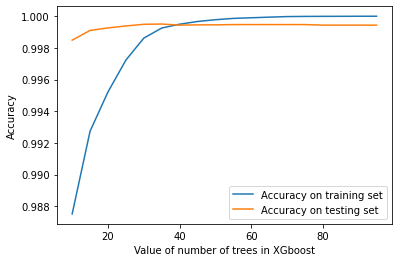

In [151]:
tree_range = range(10, 100, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree, n_jobs=-1)
    xgb.fit(X_train_smt_bal,y_train_smt_bal)
    score1.append(xgb.score(X_train_smt_bal,y_train_smt_bal))
    score2.append(xgb.score(org_Xtest,org_ytest))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [152]:
def gridSearchXGB(classifier, param_grid):
    # Instantiate the grid search model
    grid_search_XGB = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring = 'recall')
    # Fit the grid search to the data
    grid_search_XGB.fit(X_train_smt_bal, y_train_smt_bal)
    return grid_search_XGB

In [153]:
classifier = XGBClassifier()
param_grid = {
    'n_estimators': range(10,60, 10),
    'max_depth': range(4, 40, 4)
    }
gridSearchXGB = gridSearchXGB(classifier, param_grid)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 18.2min finished


In [154]:
cv_resultsXGB = pd.DataFrame(gridSearchXGB.cv_results_)
# printing the optimal accuracy score and hyperparameters
print("best recall", gridSearchXGB.best_score_)
print(gridSearchXGB.best_estimator_)

best recall 0.999991206955298
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=40, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [155]:
# Making predictions using the tuned hyper parameters
XGB_HPT= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.2,
              colsample_bynode=0.2, colsample_bytree=0.2, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=0.2, monotone_constraints='()',
              n_estimators=15, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#X_train_smt_bal,y_train_smt_bal

XGB_HPT.fit(X_train_smt_bal,y_train_smt_bal)
y_pred_train = XGB_HPT.predict(X_train_smt_bal)
y_pred_test =XGB_HPT.predict(org_Xtest)
print('Training Recall - XGB:', metrics.recall_score(y_train_smt_bal, y_pred_train)) 
print('Testing Recall - XGB:', metrics.recall_score(org_ytest, y_pred_test))

print('Train Classfication report')
print(classification_report(y_train_smt_bal, y_pred_train))

print('Test Classificaton report')
print(classification_report(org_ytest, y_pred_test))

Training Recall - XGB: 0.9148083991347625
Testing Recall - XGB: 0.7653061224489796
Train Classfication report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    227452
           1       0.98      0.91      0.95    227452

    accuracy                           0.95    454904
   macro avg       0.95      0.95      0.95    454904
weighted avg       0.95      0.95      0.95    454904

Test Classificaton report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.43      0.77      0.55        98

    accuracy                           1.00     56961
   macro avg       0.71      0.88      0.77     56961
weighted avg       1.00      1.00      1.00     56961



In [156]:
# Making predictions using the tuned hyper parameters
XGB_HPT= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.2,
              colsample_bynode=0.2, colsample_bytree=0.2, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.050000012, max_delta_step=0, max_depth=3,
              min_child_weight=0.25, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

#X_train_smt_bal,y_train_smt_bal

XGB_HPT.fit(X_train_smt_bal,y_train_smt_bal)
y_pred_train = XGB_HPT.predict(X_train_smt_bal)
y_pred_test =XGB_HPT.predict(org_Xtest)
print('Training Recall - XGB:', metrics.recall_score(y_train_smt_bal, y_pred_train)) 
print('Testing Recall - XGB:', metrics.recall_score(org_ytest, y_pred_test))

print('Train Classfication report')
print(classification_report(y_train_smt_bal, y_pred_train))

print('Test Classificaton report')
print(classification_report(org_ytest, y_pred_test))

Training Recall - XGB: 0.8691460176213003
Testing Recall - XGB: 0.8367346938775511
Train Classfication report
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    227452
           1       1.00      0.87      0.93    227452

    accuracy                           0.93    454904
   macro avg       0.94      0.93      0.93    454904
weighted avg       0.94      0.93      0.93    454904

Test Classificaton report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.37      0.84      0.52        98

    accuracy                           1.00     56961
   macro avg       0.69      0.92      0.76     56961
weighted avg       1.00      1.00      1.00     56961



In [157]:
print('Train  ROC-AUC Score - SMOTE Balanced HyperParameter Tuned Random Forest:', roc_auc_score(y_train_smt_bal, y_pred_train))

Train  ROC-AUC Score - SMOTE Balanced HyperParameter Tuned Random Forest: 0.933034222605209


- we could see that after the further tuning of the parametrs we can achieve a decent level of Training and Test recall.
- As of now the Training and testing recall is with in +/- 5% varaition
- AUC of ROC is also decent at 0.93 as of now

### Imbalance handling using ADASYN

In [158]:
adsyn = ADASYN(random_state=42)
X_train_adsyn, y_train_adsyn = adsyn.fit_resample(org_Xtrain, org_ytrain)

In [159]:
# Checking the imbalance y_train data
imbalance = (y_train_adsyn != 0).sum()/(y_train_adsyn == 0).sum()
print("Imbalance in the Train Data : ",imbalance)

Imbalance in the Train Data :  0.9997889664632538


In [160]:
# Transforming the arrays into dataframes 'X_train_adsyn_bal' and 'y_train_adsyn_bal'

X_train_adsyn_bal = pd.DataFrame(X_train_adsyn, columns=org_Xtrain_cols)
y_train_adsyn_bal = pd.DataFrame(y_train_adsyn, columns=['Class'])

display(X_train_adsyn_bal.head())
display(y_train_adsyn_bal.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
0,-0.904815,-0.131503,2.176074,0.983588,-0.256110,0.459227,0.193516,0.020305,0.380443,0.127074,-0.513088,-0.774671,-0.997398,-0.404755,1.711206,-0.600774,0.215544,0.009991,0.503467,0.323559,-0.007670,0.366644,-0.189647,0.015102,0.211929,-0.323884,0.323027,-0.053332,0.728303,-1.318770
1,0.626390,0.093067,-0.035062,0.387928,0.031947,0.045846,-0.063874,0.006711,-0.184488,-0.115195,1.523934,1.296242,0.498814,-0.232720,0.674890,0.491958,-0.175639,-0.238612,-0.169496,-0.093203,-0.298760,-0.884170,0.153342,-0.637483,0.288440,0.353130,-0.035793,0.057491,-0.770760,-1.318770
2,-0.904242,-0.871858,1.381297,0.341811,-0.374492,1.320901,0.639714,0.172348,-1.453859,0.234324,0.640742,-0.104954,0.724952,-0.255865,2.872435,-2.809663,1.383126,-0.165261,-2.838493,0.680896,0.357879,1.069496,1.501808,-1.133450,-0.653607,-0.209953,-0.151417,-0.173752,1.064652,-1.318621
3,-0.742857,-0.202760,1.401049,-0.581136,-0.019151,0.983351,0.191907,0.309141,-1.319689,-0.008922,-0.179270,0.026987,0.517344,-0.381222,-0.720269,-1.194700,-0.829186,2.435570,-1.528799,-0.273184,-0.133275,-0.013060,-0.317680,-1.756645,1.276336,-0.399896,0.144087,0.201524,0.657262,-1.318621
4,-0.823641,0.530197,1.160592,0.357540,-0.305614,0.187360,0.479194,-0.331706,0.769520,0.718432,-0.798770,0.496185,1.343525,-1.168769,0.138162,-0.580731,-0.319406,-0.066425,0.986458,0.528646,0.004660,1.107811,-0.232990,0.145885,-0.429239,1.053668,0.541488,0.669838,0.444141,-1.318489


,Class
0,0
1,0
2,0
3,0
4,0


In [161]:
print("X_train_adsyn_bal :", X_train_adsyn_bal.shape)
print("y_train_adsyn_bal :", y_train_adsyn_bal.shape)

X_train_adsyn_bal : (454856, 30)
y_train_adsyn_bal : (454856, 1)


In [162]:
y_train_adsyn_bal['Class'].value_counts()

0    227452
1    227404
Name: Class, dtype: int64

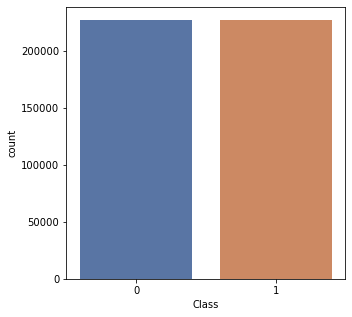

In [163]:
#plotting the dist plot to check if the imbalance has been resolved

#Plot a count plot based on the target variable 'class'
plt.figure(figsize=(5,5))
sns.countplot(x = "Class", palette='deep', data = y_train_adsyn_bal )
plt.xticks(rotation = 0)
plt.show()

### Logistic Regression on ADASYN balanced dataset

In [164]:
# Performing Hyper-parameter tuning and Cross-validation
from sklearn.linear_model import LogisticRegression
grid={'C':np.arange(0.001, 0.1, 0.02), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg_adsyn_bal=LogisticRegression(random_state=42, n_jobs=-1)
logreg_adsyn_cv=GridSearchCV(logreg_adsyn_bal,grid,cv=10)
logreg_adsyn_cv.fit(X_train_adsyn_bal,y_train_adsyn_bal)


GridSearchCV(cv=10, estimator=LogisticRegression(n_jobs=-1, random_state=42),
             param_grid={'C': array([0.001, 0.021, 0.041, 0.061, 0.081]),
                         'penalty': ['l1', 'l2']})

In [165]:
print("Tuned hyperparameters :(Best parameters): ", logreg_adsyn_cv.best_params_)

Tuned hyperparameters :(Best parameters):  {'C': 0.021, 'penalty': 'l2'}


In [166]:
logreg_cv_adsyn_bal_result_df = pd.DataFrame(logreg_adsyn_cv.cv_results_)

In [167]:
logreg_adsyn_cv.best_estimator_.get_params()

{'C': 0.021,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [168]:
## fitting the model on train set using the best estimator
logreg_adsyn_bal.set_params(**logreg_adsyn_cv.best_estimator_.get_params())
logreg_adsyn_bal.set_params(class_weight='balanced', solver = 'sag')


LogisticRegression(C=0.021, class_weight='balanced', n_jobs=-1, random_state=42,
                   solver='sag')

In [169]:
logreg_adsyn_bal = LogisticRegression(C=0.021, class_weight= 'balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='sag', tol=0.0001, verbose=0, warm_start=False)

In [170]:
logreg_train_adsyn_bal = logreg_adsyn_bal.fit(X_train_adsyn_bal, y_train_adsyn_bal)

In [171]:
# predicting on train data set
y_logreg_train_adsyn_bal_pred_prob = logreg_train_adsyn_bal.predict_proba(X_train_adsyn_bal)[:,1]
y_logreg_train_adsyn_bal_pred_prob

array([0.73040383, 0.26638102, 0.73555208, ..., 1.        , 1.        ,
       1.        ])

In [172]:
## Assigning a coloumn to predicted probabilities in dataframe

y_logreg_train_adsyn_bal_pred = pd.DataFrame(y_train_adsyn_bal)
y_logreg_train_adsyn_bal_pred['Class_probability'] = y_logreg_train_adsyn_bal_pred_prob
print(y_logreg_train_adsyn_bal_pred.shape)
y_logreg_train_adsyn_bal_pred.head()

(454856, 2)


,Class,Class_probability
0,0,0.730404
1,0,0.266381
2,0,0.735552
3,0,0.350677
4,0,0.153334


In [173]:
y_logreg_train_adsyn_bal_pred = y_logreg_train_adsyn_bal_pred.rename(columns={ 0 : 'Class'})

In [174]:
y_logreg_train_adsyn_bal_pred.head()

,Class,Class_probability
0,0,0.730404
1,0,0.266381
2,0,0.735552
3,0,0.350677
4,0,0.153334


In [175]:
fpr, tpr, thresholds = metrics.roc_curve( y_logreg_train_adsyn_bal_pred.Class, y_logreg_train_adsyn_bal_pred.Class_probability, drop_intermediate = False )

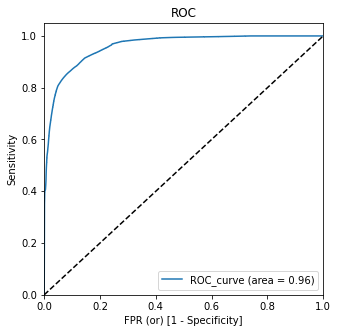

In [176]:
plot_ROC(y_logreg_train_adsyn_bal_pred.Class,y_logreg_train_adsyn_bal_pred.Class_probability)

In [177]:
# Creating columns with different probabilities

numbers = [float(x)/10 for x in range(10)]
for n in numbers:
    y_logreg_train_adsyn_bal_pred[n]= y_logreg_train_adsyn_bal_pred.Class_probability.map(lambda x: 1 if x > n else 0)
y_logreg_train_adsyn_bal_pred.head()

,Class,Class_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.730404,1,1,1,1,1,1,1,1,0,0
1,0,0.266381,1,1,1,0,0,0,0,0,0,0
2,0,0.735552,1,1,1,1,1,1,1,1,0,0
3,0,0.350677,1,1,1,1,0,0,0,0,0,0
4,0,0.153334,1,1,0,0,0,0,0,0,0,0


In [178]:
# Calculating Sensitivity, Specificity and Accuracy at various Probability cutoffs
# Importing confusion_matrix from sklearn

cutoff_prob_adsyn_bal_df = pd.DataFrame(columns = ['Probability', 'Sensitivity','Specificity','Accuracy'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cfm = metrics.confusion_matrix(y_logreg_train_adsyn_bal_pred.Class, y_logreg_train_adsyn_bal_pred[i] )
    total=sum(sum(cfm))
    Sensitivity = cfm[1,1]/(cfm[1,0]+cfm[1,1])
    Specificity = cfm[0,0]/(cfm[0,0]+cfm[0,1])
    Accuracy = (cfm[0,0]+cfm[1,1])/total    
    cutoff_prob_adsyn_bal_df.loc[i] = [i, Sensitivity, Specificity, Accuracy]
cutoff_prob_adsyn_bal_df

,Probability,Sensitivity,Specificity,Accuracy
0.0,0.0,1.000000,0.000000,0.499947
0.1,0.1,0.993228,0.569140,0.781162
0.2,0.2,0.978228,0.724258,0.851230
0.3,0.3,0.935947,0.812422,0.874178
0.4,0.4,0.896031,0.872879,0.884454
0.5,0.5,0.859369,0.912241,0.885808
0.6,0.6,0.827659,0.938444,0.883057
0.7,0.7,0.786376,0.957112,0.871753
0.8,0.8,0.719213,0.970209,0.844724
0.9,0.9,0.619721,0.982577,0.801168


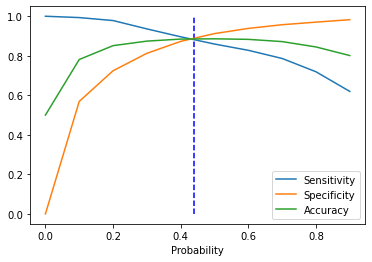

In [179]:
# Plotting Sensitivity and Specificity for various probabilities.
cutoff_prob_adsyn_bal_df.plot.line(x='Probability', y=['Sensitivity','Specificity','Accuracy'])
plt.vlines(x=0.44, ymax=1, ymin=0, colors="b", linestyles="--")
plt.savefig("Cutoff point",bbox_inches='tight')
plt.show()

In [180]:
ct_val = 0.44
y_logreg_train_adsyn_bal_pred['Predicted_outcome']=y_logreg_train_adsyn_bal_pred.Class_probability.map(lambda x: 1 if x > ct_val else 0)
y_logreg_train_adsyn_bal_pred.head(10)

,Class,Class_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_outcome
0,0,0.730404,1,1,1,1,1,1,1,1,0,0,1
1,0,0.266381,1,1,1,0,0,0,0,0,0,0,0
2,0,0.735552,1,1,1,1,1,1,1,1,0,0,1
3,0,0.350677,1,1,1,1,0,0,0,0,0,0,0
4,0,0.153334,1,1,0,0,0,0,0,0,0,0,0
5,0,0.297509,1,1,1,0,0,0,0,0,0,0,0
6,0,0.666208,1,1,1,1,1,1,1,0,0,0,1
7,0,0.316175,1,1,1,1,0,0,0,0,0,0,0
8,0,0.064911,1,0,0,0,0,0,0,0,0,0,0
9,0,0.193153,1,1,0,0,0,0,0,0,0,0,0


In [181]:
# Finding Confusion matrix
confusion_matrix_train_adsyn_bal_1 = metrics.confusion_matrix(y_logreg_train_adsyn_bal_pred.Class,y_logreg_train_adsyn_bal_pred.Predicted_outcome)
confusion_matrix_train_adsyn_bal_1

array([[202586,  24866],
       [ 27469, 199935]], dtype=int64)

In [182]:
TN = confusion_matrix_train_adsyn_bal_1[0,0] # True Negatives
FP = confusion_matrix_train_adsyn_bal_1[0,1] # False Positives
FN = confusion_matrix_train_adsyn_bal_1[1,0] # False Negatives
TP = confusion_matrix_train_adsyn_bal_1[1,1] # True Positives

In [183]:
## Overall Accuracy of train model in percentage
print("\n Logistic Regression - Accuracy % for Train: ", round(metrics.accuracy_score(y_logreg_train_adsyn_bal_pred.Class, y_logreg_train_adsyn_bal_pred.Predicted_outcome)*100,3))


 Logistic Regression - Accuracy % for Train:  88.494


In [184]:
print("Sensitivity for Train:",round(TP / float(TP+FN)*100,2))
print("Specificity for Train:",round(TN / float(TN+FP)*100,2))
print('False Positive Rate for Train: ', round(FP/ float(TN+FP)*100,2)) # predicting Fraud when user has been Non-Fraud
print ('Positive Predictive Value for Train: ', round(TP / float(TP+FP)*100,2))
print ('Negative Predictive Value for Train: ', round(TN / float(TN+FN)*100,2))
print("Recall_Score for Train:", round(recall_score(y_logreg_train_adsyn_bal_pred.Class, y_logreg_train_adsyn_bal_pred.Predicted_outcome)*100,2))

Sensitivity for Train: 87.92
Specificity for Train: 89.07
False Positive Rate for Train:  10.93
Positive Predictive Value for Train:  88.94
Negative Predictive Value for Train:  88.06
Recall_Score for Train: 87.92


In [185]:
# Making predictions on Test data
y_logreg_adsyn_bal_pred_test = logreg_adsyn_bal.predict(org_Xtest)

In [186]:
logreg_confusion_adsyn_bal_test = metrics.confusion_matrix(org_ytest,y_logreg_adsyn_bal_pred_test)
print('Confusion Matrix_adsyn_bal_Test: ', '\n')
print(logreg_confusion_adsyn_bal_test)

Confusion Matrix_adsyn_bal_Test:  

[[53508  3355]
 [    9    89]]


In [187]:
#Overall Accuracy of test model in percentage

print("\n Logistic Regression - Accuracy in % : ", round(metrics.accuracy_score(org_ytest, y_logreg_adsyn_bal_pred_test)*100,4))


 Logistic Regression - Accuracy in % :  94.0942


In [188]:
# Assigning each element in Confusion_Matrix to variables
TN = logreg_confusion_adsyn_bal_test[0,0] # True Negatives
FP = logreg_confusion_adsyn_bal_test[0,1] # False Positives
FN = logreg_confusion_adsyn_bal_test[1,0] # False Negatives
TP = logreg_confusion_adsyn_bal_test[1,1] # True Positives


In [189]:
# Printing classification report
print(classification_report(org_ytest, y_logreg_adsyn_bal_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56863
           1       0.03      0.91      0.05        98

    accuracy                           0.94     56961
   macro avg       0.51      0.92      0.51     56961
weighted avg       1.00      0.94      0.97     56961



In [190]:
print("Sensitivity:",round(TP / float(TP+FN)*100,2))
print("Specificity:",round(TN / float(TN+FP)*100,2))
print('False Positive Rate : ', round(FP/ float(TN+FP)*100,2)) # predicting Fraud when user has been Non-Fraud
print ('Positive Predictive Value : ', round(TP / float(TP+FP)*100,2))
print ('Negative Predictive Value : ', round(TN / float(TN+FN)*100,2))
print("Recall_Score:", round(recall_score(org_ytest, y_logreg_adsyn_bal_pred_test)*100,2))
print("ROC-AUC score:", round(roc_auc_score(org_ytest, y_logreg_adsyn_bal_pred_test)*100,2))

Sensitivity: 90.82
Specificity: 94.1
False Positive Rate :  5.9
Positive Predictive Value :  2.58
Negative Predictive Value :  99.98
Recall_Score: 90.82
ROC-AUC score: 92.46


### Observations:
1. The best Recall score till now: 90.82, which is in +/- 5% devation with training recall score
2. ROC-AUC Score: 0.92

### Decsion Tree on ADASYN Balanced Dataset

In [191]:
y_train_adsyn_bal = y_train_adsyn_bal['Class']
y_train_adsyn_bal = pd.DataFrame(y_train_adsyn_bal, columns= ['Class'])

In [195]:
def BuildDT(classifier,x,y):
    param_grid = {
    'max_depth': range(5, 100, 20),
    'min_samples_leaf': range(50, 150, 30),
    'min_samples_split': range(50, 150, 30),
    'criterion': ["entropy", "gini"]
    }
    n_folds = 3

    BuildDT = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, scoring = 'recall', n_jobs =-1)
    BuildDT.fit(x, y)
    return BuildDT

In [196]:
# determining the classifier
classifier = DecisionTreeClassifier()
x=X_train_adsyn_bal
y=y_train_adsyn_bal
BuildDT = BuildDT(classifier,x,y)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  8.0min finished


In [197]:
BuildDT

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 100, 20),
                         'min_samples_leaf': range(50, 150, 30),
                         'min_samples_split': range(50, 150, 30)},
             scoring='recall', verbose=1)

In [198]:
cv_results = pd.DataFrame(BuildDT.cv_results_)
# printing the optimal accuracy score and hyperparameters
print("best recall", BuildDT.best_score_)
print(BuildDT.best_estimator_)

best recall 0.883287506176484
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=50)


In [199]:
# model with optimal hyperparameters
ADA_DT_HPT1 = DecisionTreeClassifier()
ADA_DT_HPT1 = DecisionTreeClassifier(criterion = "entropy",
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
ADA_DT_HPT1.fit(X_train_adsyn_bal, y_train_adsyn_bal)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=50)

In [200]:
# Let's check the evaluation metrics of our default model
# Making predictions
y_pred_ADA_train_hpt = ADA_DT_HPT1.predict(X_train_adsyn_bal)
y_pred_ADA_hpt = ADA_DT_HPT1.predict(org_Xtest)

# Printing classification report
print(classification_report(org_ytest, y_pred_ADA_hpt))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56863
           1       0.02      0.79      0.03        98

    accuracy                           0.92     56961
   macro avg       0.51      0.86      0.50     56961
weighted avg       1.00      0.92      0.96     56961



In [201]:
print('ROC-AUC Score - ADASYN Balanced Decision Tree:', roc_auc_score(y_train_adsyn_bal, y_pred_ADA_train_hpt))
print('Test ROC-AUC Score - ADASYN Balanced Decision Tree:', roc_auc_score(org_ytest, y_pred_ADA_hpt))

ROC-AUC Score - ADASYN Balanced Decision Tree: 0.889050465025764
Test ROC-AUC Score - ADASYN Balanced Decision Tree: 0.8552843802522855


### observations for ADASYN balanced Decision Tree:
1. Recall : 88%
2. Test ROC-AUC Score: 0.85

## Default Random Forest on ASASYN Balanced Dataset

In [202]:
rfc_ada = RandomForestClassifier()
rfc_ada.fit(X_train_adsyn_bal, y_train_adsyn_bal)

RandomForestClassifier()

In [203]:
# Making predictions
predictions = rfc_ada.predict(org_Xtest)
# Let's check the report of our default model
print(classification_report(org_ytest,predictions))
print('Test ROC-AUC Score - ADASYN Balanced Default Random Forest:', roc_auc_score(org_ytest, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      0.56      0.72        98

    accuracy                           1.00     56961
   macro avg       1.00      0.78      0.86     56961
weighted avg       1.00      1.00      1.00     56961

Test ROC-AUC Score - ADASYN Balanced Default Random Forest: 0.7806122448979591


Observations for default Random Forest for the ADASYN Balanced Dataset:
    - Recall: 63% 
    - F-1 Score: 78%
    - ROC -AUC: 0.81

### Hyper parameter Tuned Random Forest on ADASYN Balanced Dataset

In [204]:
def gridSearchRFC(classifier, param_grid):
    # Instantiate the grid search model
    grid_search_RFC = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring = 'recall')
    # Fit the grid search to the data
    grid_search_RFC.fit(X_train_adsyn_bal, y_train_adsyn_bal)
    return grid_search_RFC

In [205]:
classifier = RandomForestClassifier()
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
    }
gridSearchRFC = gridSearchRFC(classifier, param_grid)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed: 42.4min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 69.9min finished


In [206]:
cv_resultsRFC = pd.DataFrame(gridSearchRFC.cv_results_)
# printing the optimal accuracy score and hyperparameters
print("best recall", gridSearchRFC.best_score_)
print(gridSearchRFC.best_estimator_)

best recall 0.8681645279406096
RandomForestClassifier(max_depth=8, max_features=10, min_samples_leaf=300,
                       min_samples_split=400, n_estimators=300)


In [207]:
# Making predictions
predictions = gridSearchRFC.predict(org_Xtest)
# Let's check the report of our default model
print(classification_report(org_ytest,predictions))
print('Test ROC-AUC Score - ADASYN Balanced Default Random Forest:', roc_auc_score(org_ytest, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.65      0.77      0.70        98

    accuracy                           1.00     56961
   macro avg       0.82      0.88      0.85     56961
weighted avg       1.00      1.00      1.00     56961

Test ROC-AUC Score - ADASYN Balanced Default Random Forest: 0.882292545599215


Observations:
    - Recall: 73% 
    - F-1 Score: 72%
    - ROC -AUC: 0.87

## XG Boost on ADASYN Balanced Dataset

In [208]:
XGB_def =XGBClassifier()
XGB_def.fit(X_train_adsyn_bal,y_train_adsyn_bal)
y_pred_xgb_def =XGB_def.predict(org_Xtest)
print('Precision - XGB:', metrics.precision_score(org_ytest, y_pred_xgb_def)) 
print('Recall - XGB:', metrics.recall_score(org_ytest, y_pred_xgb_def))
print(classification_report(org_ytest, y_pred_xgb_def))

Precision - XGB: 0.9692307692307692
Recall - XGB: 0.6428571428571429
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.64      0.77        98

    accuracy                           1.00     56961
   macro avg       0.98      0.82      0.89     56961
weighted avg       1.00      1.00      1.00     56961



In [209]:
def gridSearchXGB(classifier, param_grid):
    # Instantiate the grid search model
    grid_search_XGB = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring = 'recall')
    # Fit the grid search to the data
    grid_search_XGB.fit(X_train_adsyn_bal,y_train_adsyn_bal)
    return grid_search_XGB

In [210]:
classifier = XGBClassifier()
param_grid = {
    'n_estimators': range(10,60, 10),
    'max_depth': range(4, 40, 4)
    }
gridSearchXGB = gridSearchXGB(classifier, param_grid)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 18.5min finished


In [211]:
cv_resultsXGB = pd.DataFrame(gridSearchXGB.cv_results_)
# printing the optimal accuracy score and hyperparameters
print("best recall", gridSearchXGB.best_score_)
print(gridSearchXGB.best_estimator_)

best recall 0.9192361156521285
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=40, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [212]:
# Making predictions using the tuned hyper parameters
XGB_HPT= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=0.8, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

#X_train_smt_bal,y_train_smt_bal

XGB_HPT.fit(X_train_adsyn_bal,y_train_adsyn_bal)
y_pred_train = XGB_HPT.predict(X_train_adsyn_bal)
y_pred_test =XGB_HPT.predict(org_Xtest)
print('Training Recall - XGB:', round(metrics.recall_score(y_train_adsyn_bal, y_pred_train),2) )
print('Testing Recall - XGB:', round(metrics.recall_score(org_ytest, y_pred_test),2))

print('Train Classfication report')
print(classification_report(y_train_adsyn_bal, y_pred_train))

print('Test Classificaton report')
print(classification_report(org_ytest, y_pred_test))

Training Recall - XGB: 0.93
Testing Recall - XGB: 0.9
Train Classfication report
              precision    recall  f1-score   support

           0       0.93      0.94      0.94    227452
           1       0.94      0.93      0.94    227404

    accuracy                           0.94    454856
   macro avg       0.94      0.94      0.94    454856
weighted avg       0.94      0.94      0.94    454856

Test Classificaton report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56863
           1       0.05      0.90      0.09        98

    accuracy                           0.97     56961
   macro avg       0.52      0.93      0.54     56961
weighted avg       1.00      0.97      0.98     56961



In [213]:
print('Train ROC-AUC Score - SMOTE Balanced HyperParameter Tuned Random Forest:', roc_auc_score(y_train_adsyn_bal, y_pred_train))

Train ROC-AUC Score - SMOTE Balanced HyperParameter Tuned Random Forest: 0.9354713065059651


Observations:
    1. One of the Best train and Test Recall scores are obtained in the ADASYN Balanced Hyper Parameter tuned XGBoost with:
        - Train Recall: 93%
        - Test Recall: 90%
        - AUC -ROC Score: 0.93

### Data Imbalance Handling using Random Over-sampling

In [214]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [215]:
rdos = RandomOverSampler(random_state=42)
X_train_rdos, y_train_rdos = rdos.fit_resample(org_Xtrain, org_ytrain)

In [216]:
imbalance = (y_train_rdos != 0).sum()/(y_train_rdos == 0).sum()
print("Imbalance in the Train Data : ",imbalance)

Imbalance in the Train Data :  1.0


In [217]:
# Transforming the arrays into dataframes 'X_train_rdos_bal' and 'y_train_rdos_bal'

X_train_rdos_bal = pd.DataFrame(X_train_rdos, columns=org_Xtrain_cols)
y_train_rdos_bal = pd.DataFrame(y_train_rdos, columns=['Class'])

display(X_train_rdos_bal.head())
display(y_train_rdos_bal.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
0,-0.904815,-0.131503,2.176074,0.983588,-0.256110,0.459227,0.193516,0.020305,0.380443,0.127074,-0.513088,-0.774671,-0.997398,-0.404755,1.711206,-0.600774,0.215544,0.009991,0.503467,0.323559,-0.007670,0.366644,-0.189647,0.015102,0.211929,-0.323884,0.323027,-0.053332,0.728303,-1.318770
1,0.626390,0.093067,-0.035062,0.387928,0.031947,0.045846,-0.063874,0.006711,-0.184488,-0.115195,1.523934,1.296242,0.498814,-0.232720,0.674890,0.491958,-0.175639,-0.238612,-0.169496,-0.093203,-0.298760,-0.884170,0.153342,-0.637483,0.288440,0.353130,-0.035793,0.057491,-0.770760,-1.318770
2,-0.904242,-0.871858,1.381297,0.341811,-0.374492,1.320901,0.639714,0.172348,-1.453859,0.234324,0.640742,-0.104954,0.724952,-0.255865,2.872435,-2.809663,1.383126,-0.165261,-2.838493,0.680896,0.357879,1.069496,1.501808,-1.133450,-0.653607,-0.209953,-0.151417,-0.173752,1.064652,-1.318621
3,-0.742857,-0.202760,1.401049,-0.581136,-0.019151,0.983351,0.191907,0.309141,-1.319689,-0.008922,-0.179270,0.026987,0.517344,-0.381222,-0.720269,-1.194700,-0.829186,2.435570,-1.528799,-0.273184,-0.133275,-0.013060,-0.317680,-1.756645,1.276336,-0.399896,0.144087,0.201524,0.657262,-1.318621
4,-0.823641,0.530197,1.160592,0.357540,-0.305614,0.187360,0.479194,-0.331706,0.769520,0.718432,-0.798770,0.496185,1.343525,-1.168769,0.138162,-0.580731,-0.319406,-0.066425,0.986458,0.528646,0.004660,1.107811,-0.232990,0.145885,-0.429239,1.053668,0.541488,0.669838,0.444141,-1.318489


,Class
0,0
1,0
2,0
3,0
4,0


In [218]:
y_train_rdos_bal['Class'].value_counts()

1    227452
0    227452
Name: Class, dtype: int64

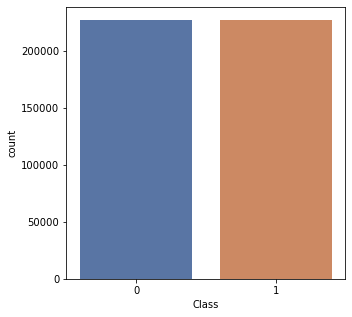

In [219]:
#plotting the dist plot to check if the imbalance has been resolved

#Plot a count plot based on the target variable 'class'
plt.figure(figsize=(5,5))
sns.countplot(x = "Class", palette='deep', data = y_train_rdos_bal )
plt.xticks(rotation = 0)
plt.show()

### Logistic Regression on Random Oversampling balanced dataset

In [220]:
# Performing Hyper-parameter tuning and Cross-validation
from sklearn.linear_model import LogisticRegression
grid={'C':np.arange(0.001, 0.1, 0.02), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg_rdos_bal=LogisticRegression(random_state=42, n_jobs=-1)
logreg_rdos_cv=GridSearchCV(logreg_rdos_bal,grid,cv=10)
logreg_rdos_cv.fit(X_train_rdos_bal,y_train_rdos_bal)

GridSearchCV(cv=10, estimator=LogisticRegression(n_jobs=-1, random_state=42),
             param_grid={'C': array([0.001, 0.021, 0.041, 0.061, 0.081]),
                         'penalty': ['l1', 'l2']})

In [221]:
print("Tuned hyperparameters :(Best parameters): ", logreg_rdos_cv.best_params_)

Tuned hyperparameters :(Best parameters):  {'C': 0.001, 'penalty': 'l2'}


In [222]:
logreg_cv_rdos_bal_result_df = pd.DataFrame(logreg_rdos_cv.cv_results_)

In [223]:
logreg_rdos_cv.best_estimator_.get_params()

{'C': 0.001,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [224]:
logreg_rdos_bal.set_params(**logreg_rdos_cv.best_estimator_.get_params())
logreg_rdos_bal.set_params(class_weight='balanced', solver = 'sag')

LogisticRegression(C=0.001, class_weight='balanced', n_jobs=-1, random_state=42,
                   solver='sag')

In [225]:
logreg_rdos_bal = LogisticRegression(C=0.001, class_weight= 'balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='sag', tol=0.0001, verbose=0, warm_start=False)

In [226]:
logreg_train_rdos_bal = logreg_rdos_bal.fit(X_train_rdos_bal, y_train_rdos_bal)

In [227]:
# predicting on train data set
y_logreg_train_rdos_bal_pred_prob = logreg_train_rdos_bal.predict_proba(X_train_rdos_bal)[:,1]
y_logreg_train_rdos_bal_pred_prob

array([0.31991002, 0.04454112, 0.26032531, ..., 1.        , 0.99993951,
       0.75366621])

In [228]:
y_logreg_train_rdos_bal_pred = pd.DataFrame(y_train_rdos_bal)
y_logreg_train_rdos_bal_pred['Class_probability'] = y_logreg_train_rdos_bal_pred_prob
print(y_logreg_train_rdos_bal_pred.shape)
y_logreg_train_rdos_bal_pred.head()

(454904, 2)


,Class,Class_probability
0,0,0.319910
1,0,0.044541
2,0,0.260325
3,0,0.080957
4,0,0.082672


In [229]:
y_logreg_train_rdos_bal_pred = y_logreg_train_rdos_bal_pred.rename(columns={ 0 : 'Class'})

In [230]:
fpr, tpr, thresholds = metrics.roc_curve( y_logreg_train_rdos_bal_pred.Class, y_logreg_train_rdos_bal_pred.Class_probability, drop_intermediate = False )

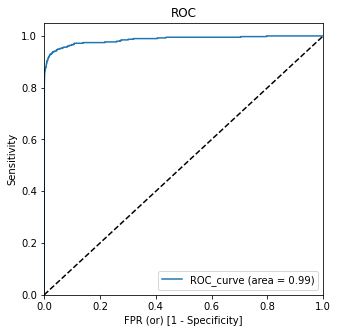

In [231]:
plot_ROC(y_logreg_train_rdos_bal_pred.Class,y_logreg_train_rdos_bal_pred.Class_probability)

In [232]:
# Creating columns with different probabilities

numbers = [float(x)/10 for x in range(10)]
for n in numbers:
    y_logreg_train_rdos_bal_pred[n]= y_logreg_train_rdos_bal_pred.Class_probability.map(lambda x: 1 if x > n else 0)
y_logreg_train_rdos_bal_pred.head()

,Class,Class_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.319910,1,1,1,1,0,0,0,0,0,0
1,0,0.044541,1,0,0,0,0,0,0,0,0,0
2,0,0.260325,1,1,1,0,0,0,0,0,0,0
3,0,0.080957,1,0,0,0,0,0,0,0,0,0
4,0,0.082672,1,0,0,0,0,0,0,0,0,0


In [233]:
# Calculating Sensitivity, Specificity and Accuracy at various Probability cutoffs
# Importing confusion_matrix from sklearn

cutoff_prob_rdos_bal_df = pd.DataFrame(columns = ['Probability', 'Sensitivity','Specificity','Accuracy'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cfm = metrics.confusion_matrix(y_logreg_train_rdos_bal_pred.Class, y_logreg_train_rdos_bal_pred[i] )
    total=sum(sum(cfm))
    Sensitivity = cfm[1,1]/(cfm[1,0]+cfm[1,1])
    Specificity = cfm[0,0]/(cfm[0,0]+cfm[0,1])
    Accuracy = (cfm[0,0]+cfm[1,1])/total    
    cutoff_prob_rdos_bal_df.loc[i] = [i, Sensitivity, Specificity, Accuracy]
cutoff_prob_rdos_bal_df

,Probability,Sensitivity,Specificity,Accuracy
0.0,0.0,1.000000,0.000000,0.500000
0.1,0.1,0.974285,0.784627,0.879456
0.2,0.2,0.964089,0.907097,0.935593
0.3,0.3,0.949189,0.951181,0.950185
0.4,0.4,0.934263,0.970952,0.952608
0.5,0.5,0.923870,0.981165,0.952517
0.6,0.6,0.908772,0.986674,0.947723
0.7,0.7,0.900951,0.990205,0.945578
0.8,0.8,0.880955,0.993361,0.937158
0.9,0.9,0.865519,0.997490,0.931504


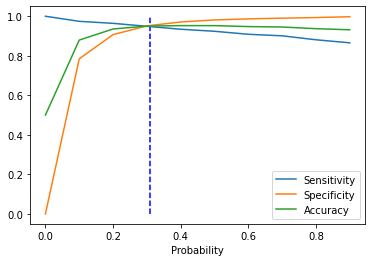

In [234]:
# Plotting Sensitivity and Specificity for various probabilities.
cutoff_prob_rdos_bal_df.plot.line(x='Probability', y=['Sensitivity','Specificity','Accuracy'])
plt.vlines(x=0.31, ymax=1, ymin=0, colors="b", linestyles="--")
plt.savefig("Cutoff point",bbox_inches='tight')
plt.show()

In [235]:
ct_val = 0.31
y_logreg_train_rdos_bal_pred['Predicted_outcome']=y_logreg_train_rdos_bal_pred.Class_probability.map(lambda x: 1 if x > ct_val else 0)
y_logreg_train_rdos_bal_pred.head(10)

,Class,Class_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_outcome
0,0,0.319910,1,1,1,1,0,0,0,0,0,0,1
1,0,0.044541,1,0,0,0,0,0,0,0,0,0,0
2,0,0.260325,1,1,1,0,0,0,0,0,0,0,0
3,0,0.080957,1,0,0,0,0,0,0,0,0,0,0
4,0,0.082672,1,0,0,0,0,0,0,0,0,0,0
5,0,0.065891,1,0,0,0,0,0,0,0,0,0,0
6,0,0.225220,1,1,1,0,0,0,0,0,0,0,0
7,0,0.078932,1,0,0,0,0,0,0,0,0,0,0
8,0,0.039662,1,0,0,0,0,0,0,0,0,0,0
9,0,0.034716,1,0,0,0,0,0,0,0,0,0,0


In [236]:
# Finding Confusion matrix
confusion_matrix_train_rdos_bal_1 = metrics.confusion_matrix(y_logreg_train_rdos_bal_pred.Class,y_logreg_train_rdos_bal_pred.Predicted_outcome)
confusion_matrix_train_rdos_bal_1

array([[216927,  10525],
       [ 12136, 215316]], dtype=int64)

In [237]:
TN = confusion_matrix_train_rdos_bal_1[0,0] # True Negatives
FP = confusion_matrix_train_rdos_bal_1[0,1] # False Positives
FN = confusion_matrix_train_rdos_bal_1[1,0] # False Negatives
TP = confusion_matrix_train_rdos_bal_1[1,1] # True Positives

In [238]:
## Overall Accuracy of train model in percentage
print("\n Logistic Regression - Accuracy % for Train: ", round(metrics.accuracy_score(y_logreg_train_rdos_bal_pred.Class, y_logreg_train_rdos_bal_pred.Predicted_outcome)*100,3))


 Logistic Regression - Accuracy % for Train:  95.019


In [239]:
print("Sensitivity for Train:",round(TP / float(TP+FN)*100,2))
print("Specificity for Train:",round(TN / float(TN+FP)*100,2))
print('False Positive Rate for Train: ', round(FP/ float(TN+FP)*100,2)) # predicting Fraud when user has been Non-Fraud
print ('Positive Predictive Value for Train: ', round(TP / float(TP+FP)*100,2))
print ('Negative Predictive Value for Train: ', round(TN / float(TN+FN)*100,2))
print("Recall_Score for Train:", round(recall_score(y_logreg_train_rdos_bal_pred.Class, y_logreg_train_rdos_bal_pred.Predicted_outcome)*100,2))

Sensitivity for Train: 94.66
Specificity for Train: 95.37
False Positive Rate for Train:  4.63
Positive Predictive Value for Train:  95.34
Negative Predictive Value for Train:  94.7
Recall_Score for Train: 94.66


In [240]:
# Making predictions on Test data
y_logreg_rdos_bal_pred_test = logreg_rdos_bal.predict(org_Xtest)

In [241]:
logreg_confusion_rdos_bal_test = metrics.confusion_matrix(org_ytest,y_logreg_rdos_bal_pred_test)
print('Confusion Matrix_rdos_bal_Test: ', '\n')
print(logreg_confusion_rdos_bal_test)

Confusion Matrix_rdos_bal_Test:  

[[56104   759]
 [   13    85]]


In [242]:
logreg_confusion_rdos_bal_test = metrics.confusion_matrix(org_ytest,y_logreg_rdos_bal_pred_test)
print('Confusion Matrix_rdos_bal_Test: ', '\n')
print(logreg_confusion_rdos_bal_test)

Confusion Matrix_rdos_bal_Test:  

[[56104   759]
 [   13    85]]


In [243]:
#Overall Accuracy of test model in percentage

print("\n Logistic Regression - Accuracy in % : ", round(metrics.accuracy_score(org_ytest, y_logreg_rdos_bal_pred_test)*100,4))


 Logistic Regression - Accuracy in % :  98.6447


In [244]:
# Assigning each element in Confusion_Matrix to variables
TN = logreg_confusion_rdos_bal_test[0,0] # True Negatives
FP = logreg_confusion_rdos_bal_test[0,1] # False Positives
FN = logreg_confusion_rdos_bal_test[1,0] # False Negatives
TP = logreg_confusion_rdos_bal_test[1,1] # True Positives


In [245]:
# Printing classification report
print(classification_report(org_ytest, y_logreg_rdos_bal_pred_test))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.10      0.87      0.18        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.59     56961
weighted avg       1.00      0.99      0.99     56961



In [246]:
print("Sensitivity:",round(TP / float(TP+FN)*100,2))
print("Specificity:",round(TN / float(TN+FP)*100,2))
print('False Positive Rate : ', round(FP/ float(TN+FP)*100,2)) # predicting Fraud when user has been Non-Fraud
print ('Positive Predictive Value : ', round(TP / float(TP+FP)*100,2))
print ('Negative Predictive Value : ', round(TN / float(TN+FN)*100,2))
print("Recall_Score:", round(recall_score(org_ytest, y_logreg_rdos_bal_pred_test)*100,2))

Sensitivity: 86.73
Specificity: 98.67
False Positive Rate :  1.33
Positive Predictive Value :  10.07
Negative Predictive Value :  99.98
Recall_Score: 86.73


### Decsion Tree on Random OVersampled Balanced Dataset

In [247]:
y_train_rdos_bal = y_train_rdos_bal['Class']
y_train_rdos_bal = pd.DataFrame(y_train_rdos_bal, columns= ['Class'])

In [248]:
def BuildDT(classifier,x,y):
    param_grid = {
    'max_depth': range(5, 100, 20),
    'min_samples_leaf': range(50, 150, 30),
    'min_samples_split': range(50, 150, 30),
    'criterion': ["entropy", "gini"]
    }
    n_folds = 3

    BuildDT = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, scoring = 'recall', n_jobs =-1)
    BuildDT.fit(x, y)
    return BuildDT

In [249]:
# determining the classifier
classifier = DecisionTreeClassifier()
x=X_train_rdos_bal
y=y_train_rdos_bal
BuildDT = BuildDT(classifier,x,y)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.6min finished


In [250]:
cv_results = pd.DataFrame(BuildDT.cv_results_)
# printing the optimal accuracy score and hyperparameters
print("best recall", BuildDT.best_score_)
print(BuildDT.best_estimator_)

best recall 1.0
DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=50,
                       min_samples_split=50)


In [251]:
# model with optimal hyperparameters
RDOS_DT_HPT1 = DecisionTreeClassifier()
RDOS_DT_HPT1 = DecisionTreeClassifier(criterion = "entropy",
                                  max_depth=25, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
RDOS_DT_HPT1.fit(X_train_rdos_bal, y_train_rdos_bal)

DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=50,
                       min_samples_split=50)

In [252]:
# Let's check the evaluation metrics of our default model
# Making predictions
y_pred_RDOS_train_hpt = RDOS_DT_HPT1.predict(X_train_rdos_bal)
y_pred_RDOS_hpt = RDOS_DT_HPT1.predict(org_Xtest)

# Printing classification report
print(classification_report(org_ytest, y_pred_RDOS_hpt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.71      0.55        98

    accuracy                           1.00     56961
   macro avg       0.72      0.86      0.77     56961
weighted avg       1.00      1.00      1.00     56961



In [253]:
print('ROC-AUC Score - Random OverSampled Balanced Decision Tree:', roc_auc_score(y_train_rdos_bal, y_pred_RDOS_train_hpt))
print('Test ROC-AUC Score - Random OverSampled Balanced Decision Tree:', roc_auc_score(org_ytest, y_pred_RDOS_hpt))

ROC-AUC Score - Random OverSampled Balanced Decision Tree: 0.9990349612225876
Test ROC-AUC Score - Random OverSampled Balanced Decision Tree: 0.8563778605721521


### observations for Random OverSampled balanced Decision Tree:
1. Recall : 86%
2. Test ROC-AUC Score: 0.99

## XG Boost on Random Oversampled Balanced Dataset

In [254]:
XGB_def =XGBClassifier()
XGB_def.fit(X_train_rdos_bal,y_train_rdos_bal)
y_pred_xgb_def =XGB_def.predict(org_Xtest)
print('Precision - XGB:', metrics.precision_score(org_ytest, y_pred_xgb_def)) 
print('Recall - XGB:', metrics.recall_score(org_ytest, y_pred_xgb_def))
print(classification_report(org_ytest, y_pred_xgb_def))

Precision - XGB: 0.9859154929577465
Recall - XGB: 0.7142857142857143
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.71      0.83        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961



In [255]:
def gridSearchXGB(classifier, param_grid):
    # Instantiate the grid search model
    grid_search_XGB = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring = 'recall')
    # Fit the grid search to the data
    grid_search_XGB.fit(X_train_rdos_bal,y_train_rdos_bal)
    return grid_search_XGB

In [256]:
classifier = XGBClassifier()
param_grid = {
    'n_estimators': range(10,60, 10),
    'max_depth': range(4, 40, 4)
    }
gridSearchXGB = gridSearchXGB(classifier, param_grid)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 12.3min finished


In [257]:
cv_resultsXGB = pd.DataFrame(gridSearchXGB.cv_results_)
# printing the optimal accuracy score and hyperparameters
print("best recall", gridSearchXGB.best_score_)
print(gridSearchXGB.best_estimator_)

best recall 1.0
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [258]:
# Making predictions using the tuned hyper parameters
XGB_HPT= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=0.8, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=0.8, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#X_train_smt_bal,y_train_smt_bal

XGB_HPT.fit(X_train_rdos_bal,y_train_rdos_bal)
y_pred_train = XGB_HPT.predict(X_train_rdos_bal)
y_pred_test =XGB_HPT.predict(org_Xtest)
print('Training Recall - XGB:', metrics.recall_score(y_train_rdos_bal, y_pred_train)) 
print('Testing Recall - XGB:', metrics.recall_score(org_ytest, y_pred_test))

print('Train Classfication report')
print(classification_report(y_train_rdos_bal, y_pred_train))

print('Test Classificaton report')
print(classification_report(org_ytest, y_pred_test))

Training Recall - XGB: 0.9365096811634982
Testing Recall - XGB: 0.8163265306122449
Train Classfication report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    227452
           1       1.00      0.94      0.97    227452

    accuracy                           0.97    454904
   macro avg       0.97      0.97      0.97    454904
weighted avg       0.97      0.97      0.97    454904

Test Classificaton report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.27      0.82      0.41        98

    accuracy                           1.00     56961
   macro avg       0.63      0.91      0.70     56961
weighted avg       1.00      1.00      1.00     56961



In [259]:
print('Test ROC-AUC Score - SMOTE Balanced HyperParameter Tuned XGBoost:', roc_auc_score(org_ytest, y_pred_test))

Test ROC-AUC Score - SMOTE Balanced HyperParameter Tuned XGBoost: 0.9062639634754065


- we could see that after the further tuning of the parametrs we can achieve a decent level of Training and Test recall.
- AUC of ROC is also decent at 0.9 as of now

## Default Random Forest on RandomOversampled Balanced Dataset

In [260]:
rfc_rdos = RandomForestClassifier()
rfc_rdos.fit(X_train_rdos_bal, y_train_rdos_bal)

RandomForestClassifier()

In [261]:
# Making predictions
predictions = rfc_rdos.predict(org_Xtest)
# Let's check the report of our default model
print(classification_report(org_ytest,predictions))
print('Test ROC-AUC Score - Random Oversampled Balanced Default Random Forest:', roc_auc_score(org_ytest, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      0.62      0.77        98

    accuracy                           1.00     56961
   macro avg       1.00      0.81      0.88     56961
weighted avg       1.00      1.00      1.00     56961

Test ROC-AUC Score - Random Oversampled Balanced Default Random Forest: 0.8112244897959184


Observations for default Random Forest for the ADASYN Balanced Dataset:
    - Recall: 49% 
    - F-1 Score: 66%
    - ROC -AUC: 0.74

### Hyper parameter Tuned Random Forest on Random Over Sampled Balanced Dataset

In [262]:
def gridSearchRFC(classifier, param_grid):
    # Instantiate the grid search model
    grid_search_RFC = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring = 'recall')
    # Fit the grid search to the data
    grid_search_RFC.fit(X_train_rdos_bal, y_train_rdos_bal)
    return grid_search_RFC

In [263]:
classifier = RandomForestClassifier()
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
    }
gridSearchRFC = gridSearchRFC(classifier, param_grid)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 53.6min finished


In [264]:
cv_resultsRFC = pd.DataFrame(gridSearchRFC.cv_results_)
# printing the optimal accuracy score and hyperparameters
print("best recall", gridSearchRFC.best_score_)
print(gridSearchRFC.best_estimator_)

best recall 0.9956474265198185
RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=400, n_estimators=200)


In [265]:
# Making predictions
predictions = gridSearchRFC.predict(org_Xtest)
# Let's check the report of our default model
print(classification_report(org_ytest,predictions))
print('Test ROC-AUC Score - ADASYN Balanced Default Random Forest:', roc_auc_score(org_ytest, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.74      0.77      0.75        98

    accuracy                           1.00     56961
   macro avg       0.87      0.88      0.88     56961
weighted avg       1.00      1.00      1.00     56961

Test ROC-AUC Score - ADASYN Balanced Default Random Forest: 0.8824244415596815


In [266]:
results = pd.DataFrame({'Data':['Imbalanced'],'Method':['Decision with RFE'],'Recall': [65], 'ROC-AUC':['NC']})
results = results[['Data','Method', 'Recall', 'ROC-AUC']]
tempResults1 = pd.DataFrame({'Data':['Imbalanced'],'Method': ['Hyper parameter Tuned Decision with RFE'], 'Recall':[65], 'ROC-AUC': ['NC']})
tempResults3 = pd.DataFrame({'Data':['Imbalanced'],'Method': ['Hyper parameter Tuned Decision'], 'Recall':[71], 'ROC-AUC': ['NC']})
tempResults4 = pd.DataFrame({'Data':['Imbalanced'],'Method': ['Default Random Forest'], 'Recall':[69], 'ROC-AUC': ['NC']})
tempResults5 = pd.DataFrame({'Data':['Imbalanced'],'Method': ['Hyper parameter Tuned Random Forest'], 'Recall':[42], 'ROC-AUC': ['NC']})
tempResults6 = pd.DataFrame({'Data':['Imbalanced'],'Method': ['K-Nearest Neighbours'], 'Recall':[70], 'ROC-AUC': [0.99]})
tempResults7 = pd.DataFrame({'Data':['Imbalanced'],'Method': ['XGBoost'], 'Recall':[68], 'ROC-AUC': ['NC']})
tempResults8 = pd.DataFrame({'Data':['Imbalanced'],'Method': ['Hyper parameter Tuned XGBoost'], 'Recall':[70], 'ROC-AUC': [0.99]})
tempResults9 = pd.DataFrame({'Data':['Imbalanced'],'Method': ['Logistic Regression'], 'Recall':[64], 'ROC-AUC': [0.98]})
tempResults10 = pd.DataFrame({'Data':['Imbalanced'],'Method': ['Hyper parameter Tuned XGBoost'], 'Recall':[70], 'ROC-AUC': [0.99]})
tempResults2 = pd.DataFrame({'Data':['Imbalanced'],'Method': ['Logistic Regression'], 'Recall':[88], 'ROC-AUC': [0.98]})


tempResults11 = pd.DataFrame({'Data':['SMOTE Balanced'],'Method': ['Logistic Regression'], 'Recall':[87], 'ROC-AUC': [0.99]})
tempResults12 = pd.DataFrame({'Data':['SMOTE Balanced'],'Method': ['Hyper parameter Tuned Decision'], 'Recall':[72], 'ROC-AUC': [0.99]})
tempResults13 = pd.DataFrame({'Data':['SMOTE Balanced'],'Method': ['Decision Tree'], 'Recall':[67], 'ROC-AUC': [0.84]})
tempResults14 = pd.DataFrame({'Data':['SMOTE Balanced'],'Method': ['Hyper parameter Tuned Random Forest'], 'Recall':[76], 'ROC-AUC': [0.88]})
tempResults15 = pd.DataFrame({'Data':['SMOTE Balanced'],'Method': ['XGBoost'], 'Recall':[69], 'ROC-AUC': ['NC']})
tempResults16 = pd.DataFrame({'Data':['SMOTE Balanced'],'Method': ['Hyper parameter Tuned XGBoost'], 'Recall':[84], 'ROC-AUC': [0.93]})



tempResults17 = pd.DataFrame({'Data':['ADASYN Balanced'],'Method': ['Logistic Regression'], 'Recall':[91], 'ROC-AUC': [0.96]})
tempResults18 = pd.DataFrame({'Data':['ADASYN Balanced'],'Method': ['Hyper parameter Tuned Decision'], 'Recall':[79], 'ROC-AUC': [0.89]})
tempResults19 = pd.DataFrame({'Data':['ADASYN Balanced'],'Method': ['Hyper parameter Tuned Random Forest'], 'Recall':[73], 'ROC-AUC': [0.87]})
tempResults20 = pd.DataFrame({'Data':['ADASYN Balanced'],'Method': ['XGBoost'], 'Recall':[64], 'ROC-AUC': ['NC']})
tempResults21 = pd.DataFrame({'Data':['ADASYN Balanced'],'Method': ['Hyper parameter Tuned XGBoost'], 'Recall':[90], 'ROC-AUC': [0.94]})



tempResults22 = pd.DataFrame({'Data':['Random OverSampled Balanced'],'Method': ['Logistic Regression'], 'Recall':[87], 'ROC-AUC': [0.99]})
tempResults23 = pd.DataFrame({'Data':['Random OverSampled Balanced'],'Method': ['Hyper parameter Tuned Decision'], 'Recall':[71], 'ROC-AUC': [0.85]})
tempResults24 = pd.DataFrame({'Data':['Random OverSampled Balanced'],'Method': ['Hyper parameter Tuned Random Forest'], 'Recall':[77], 'ROC-AUC': [0.88]})
tempResults25 = pd.DataFrame({'Data':['Random OverSampled Balanced'],'Method': ['Default Random Forest'], 'Recall':[49], 'ROC-AUC': [0.74]})
tempResults26 = pd.DataFrame({'Data':['Random OverSampled Balanced'],'Method': ['Hyper parameter Tuned XGBoost'], 'Recall':[81], 'ROC-AUC': [0.91]})

#NC states Not caluculated, as the Recall itself is very low havent caluculated the ROC-AUC
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults1, tempResults3, tempResults4, tempResults5, tempResults6,
                     tempResults7, tempResults8, tempResults9,tempResults10,
                     tempResults11, tempResults12, tempResults13, tempResults14, tempResults15, tempResults16,
                     tempResults17, tempResults18, tempResults19,tempResults20,
                     tempResults21, tempResults22, tempResults23, tempResults24, tempResults25, tempResults26])
results.reset_index(inplace=True)
results.drop('index', axis =1, inplace= True)
results

,Data,Method,Recall,ROC-AUC
0,Imbalanced,Decision with RFE,65,NC
1,Imbalanced,Hyper parameter Tuned Decision with RFE,65,NC
2,Imbalanced,Hyper parameter Tuned Decision,71,NC
3,Imbalanced,Default Random Forest,69,NC
4,Imbalanced,Hyper parameter Tuned Random Forest,42,NC
5,Imbalanced,K-Nearest Neighbours,70,0.99
6,Imbalanced,XGBoost,68,NC
7,Imbalanced,Hyper parameter Tuned XGBoost,70,0.99
8,Imbalanced,Logistic Regression,64,0.98
9,Imbalanced,Hyper parameter Tuned XGBoost,70,0.99


Observations:
    Till now we have built total of 27 models and here are the various models with their recall score and ROC-AUC Score
    Since , Recall is True positive / (True Positve+False Negative), we want to optimise the Recall and we will be looking
    for the model with highest Recall, High AUC-ROC Curve and the difference between the Training and Testing Recall should 
    be less than 5% varaition i.e not overfitting

Out of all the models it is clearly observed that the models built on datasets which are balanced using the ADASYN technique
have performed better.
Especially :
    - Logistic Regression : Recall of 91% and ROC-AUC : 0.96
    - Hyper parameter Tuned XGBoost : Recall of 90 and ROC- AUC: 0.94

In [267]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=0.8, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)
clf.fit(X_train_adsyn_bal,y_train_adsyn_bal) # fit on the balanced dataset
y_pred_train = clf.predict(X_train_adsyn_bal)
y_pred_test =clf.predict(org_Xtest)
y_train_pred_prob = clf.fit(X_train_adsyn_bal,y_train_adsyn_bal).predict_proba(X_train_adsyn_bal)[:,1]
print('Training Recall - clf:', round(metrics.recall_score(y_train_adsyn_bal, y_pred_train),2) )
print('Testing Recall - clf:', round(metrics.recall_score(org_ytest, y_pred_test),2))

print('Train Classfication report')
print(classification_report(y_train_adsyn_bal, y_pred_train))

print('Test Classificaton report')
print(classification_report(org_ytest, y_pred_test))
print('Train ROC-AUC Score - SMOTE Balanced HyperParameter Tuned Random Forest:', roc_auc_score(y_train_adsyn_bal, y_pred_train))


Training Recall - clf: 0.93
Testing Recall - clf: 0.9
Train Classfication report
              precision    recall  f1-score   support

           0       0.93      0.94      0.94    227452
           1       0.94      0.93      0.94    227404

    accuracy                           0.94    454856
   macro avg       0.94      0.94      0.94    454856
weighted avg       0.94      0.94      0.94    454856

Test Classificaton report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56863
           1       0.05      0.90      0.09        98

    accuracy                           0.97     56961
   macro avg       0.52      0.93      0.54     56961
weighted avg       1.00      0.97      0.98     56961

Train ROC-AUC Score - SMOTE Balanced HyperParameter Tuned Random Forest: 0.9354713065059651


In [268]:
print('Train auc =', metrics.roc_auc_score(y_train_adsyn_bal, y_pred_train))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adsyn_bal, y_train_pred_prob, drop_intermediate = False)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9354713065059651
0.47794148


In [269]:
#X_train_adsyn_bal,y_train_adsyn_bal
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_adsyn_bal.to_numpy()[np.where(y_train_adsyn_bal==1.0)]
X_train_0 = X_train_adsyn_bal.to_numpy()[np.where(y_train_adsyn_bal==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

Top var = 4
2nd Top var = 14
3rd Top var = 18


plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [270]:
# perform the best oversampling method on X_train & y_train

clf = LogisticRegression(C=0.021, class_weight= 'balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='sag', tol=0.0001, verbose=0, warm_start=False)
clf.fit(X_train_adsyn_bal,y_train_adsyn_bal) # fit on the balanced dataset
y_pred_train = clf.predict(X_train_adsyn_bal)
y_pred_test =clf.predict(org_Xtest)
print('Training Recall - clf:', round(metrics.recall_score(y_train_adsyn_bal, y_pred_train),2) )
print('Testing Recall - clf:', round(metrics.recall_score(org_ytest, y_pred_test),2))

print('Train Classfication report')
print(classification_report(y_train_adsyn_bal, y_pred_train))

print('Test Classificaton report')
print(classification_report(org_ytest, y_pred_test))
print('Train ROC-AUC Score - SMOTE Balanced HyperParameter Logistic Regression:', roc_auc_score(y_train_adsyn_bal, y_pred_train))

Training Recall - clf: 0.86
Testing Recall - clf: 0.91
Train Classfication report
              precision    recall  f1-score   support

           0       0.87      0.91      0.89    227452
           1       0.91      0.86      0.88    227404

    accuracy                           0.89    454856
   macro avg       0.89      0.89      0.89    454856
weighted avg       0.89      0.89      0.89    454856

Test Classificaton report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56863
           1       0.03      0.91      0.05        98

    accuracy                           0.94     56961
   macro avg       0.51      0.92      0.51     56961
weighted avg       1.00      0.94      0.97     56961

Train ROC-AUC Score - SMOTE Balanced HyperParameter Logistic Regression: 0.885805026385699


In [271]:
print('Train auc =', metrics.roc_auc_score(y_train_adsyn_bal, y_pred_train))
fpr, tpr, thresholds = metrics.roc_curve(y_logreg_train_adsyn_bal_pred.Class, y_logreg_train_adsyn_bal_pred.Class_probability, drop_intermediate = False)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.885805026385699
0.5128764908099804


# Cost Benefit Analysis 

In [272]:
print('The Average amount being transacted in the dataset is :',round(creditcard_df.Amount.mean(),2))
print('The Average amount being transacted in fraud is :',round(creditcard_df[creditcard_df['Class']==1]['Amount'].mean(),2))

The Average amount being transacted in the dataset is : 88.35
The Average amount being transacted in fraud is : 122.21


We are attaining a 91 % Recall, this means that out of all the Fraudulent Transactions we are able to flag 91 % of them correctly. i.e we are actuall saving 91% of the fraud amount to the bank (Approx, as all thr transactions arent of same amount)

In [273]:
print('The  amount being identified as fraud is :',round(0.91*(creditcard_df[creditcard_df['Class']==1]['Amount'].sum()),2))

The  amount being identified as fraud is : 54716.45


so for 2 days bank is able to identify 54716.45 Euro/ dollar of fraud and this would also be considered as money saved.
Considering the 2 days revenue as average/ normal through out year bank would be saving around **9.96 Million per year**
 
 - Bank might not be even giving a 10 Million per year to a team of individuals who verify if the transaction is fraud or not, so its definetly profitable for Bank to implement this model